<a href="https://colab.research.google.com/github/piyush1856/Business-Case-OLA-Ensemble-Learning/blob/main/Business_Case_OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Driver attrition poses significant challenges to ride-hailing platforms like OLA, impacting operational efficiency and customer satisfaction. Predicting and mitigating driver turnover is crucial for maintaining a stable and efficient workforce. This case study focuses on leveraging ensemble learning techniques to develop a robust predictive model for driver attrition.

By employing methods such as bagging and boosting, the objective is to harness the power of advanced machine learning algorithms to achieve higher predictive accuracy. The dataset includes driver demographics, tenure information, and performance metrics, which will be analyzed through exploratory data analysis, preprocessing, and feature engineering.

This study aims to deliver actionable insights and a reliable predictive model that can support strategic decision-making for managing driver retention effectively.

# **Background**

The ride-hailing industry has revolutionized transportation, offering convenience and flexibility to millions of customers globally. However, driver attrition remains one of the most critical challenges for companies like OLA. High turnover rates lead to increased recruitment and training costs, reduced service reliability, and a compromised customer experience.

Driver attrition is often influenced by a combination of factors, including demographic characteristics, work performance, and job tenure. Understanding these factors and predicting attrition early is vital for implementing proactive strategies to retain drivers and ensure operational stability.

Traditional machine learning models often fall short in capturing complex patterns within data. Ensemble learning, which combines multiple models to improve predictive accuracy and robustness, offers a promising solution to this challenge. Techniques like bagging and boosting can enhance model performance by addressing issues such as overfitting, bias, and variance.

This case study aims to explore the application of ensemble learning to predict driver attrition accurately, offering insights that can help OLA retain its workforce and maintain a competitive edge in the industry.

# **Concepts Used**

To address the challenge of predicting driver attrition effectively, the following concepts and methodologies are employed in this case study:  

1. **Exploratory Data Analysis (EDA):**  
   EDA involves examining the dataset to uncover patterns, trends, and relationships among features. It also helps identify missing values, outliers, and potential data quality issues.  

2. **Data Preprocessing:**  
   - **KNN Imputation:** Used to handle missing values by imputing them based on the nearest neighbors.  
   - **Feature Engineering:** Creation of new, meaningful features or transformation of existing ones to improve model performance.  
   - **Class Imbalance Treatment:** Techniques like oversampling, undersampling, or Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset.  
   - **Standardization:** Scaling features to have zero mean and unit variance to ensure uniformity, especially important for models sensitive to feature magnitudes.  
   - **Encoding:** Converting categorical variables into numerical format using techniques like one-hot encoding or label encoding.  

3. **Ensemble Learning:**  
   Ensemble learning methods are applied to enhance the predictive power of the model:  
   - **Bagging:** Techniques such as Random Forest aggregate predictions from multiple decision trees to reduce variance and improve robustness.  
   - **Boosting:** Algorithms like Gradient Boosting or AdaBoost iteratively focus on correcting errors made by previous models, reducing bias and improving accuracy.  

4. **Model Evaluation:**  
   Evaluation metrics such as precision, recall, F1-score, and ROC-AUC are used to assess model performance. Special emphasis is placed on precision and recall to ensure a balanced trade-off between false positives and false negatives.  

5. **Insights and Recommendations:**  
   Based on the model’s predictions and analysis of important features, actionable recommendations are provided to mitigate driver attrition.  


# **Dataset Explanation**

The `ola_driver.csv` dataset includes features describing driver attributes, performance, and tenure. Below is a detailed explanation of the columns:

1. **MMMM-YY:** Reporting month and year.  
2. **Driver_ID:** A unique identifier assigned to every driver.  
3. **Age:** Age of the driver.  
4. **Gender:** Driver's gender (Male: `0`, Female: `1`).  
5. **City:** City code representing the city where the driver operates.  
6. **Education_Level:** Education level of the driver, categorized as:  
   - `0`: 10+  
   - `1`: 12+  
   - `2`: Graduate  
7. **Income:** Average monthly income of the driver.  
8. **Date Of Joining:** The date when the driver joined Ola.  
9. **LastWorkingDate:** The most recent or final day the driver worked with Ola.  
10. **Joining Designation:** The designation of the driver at the time of joining Ola.  
11. **Grade:** A grade assigned to the driver at the reporting time, likely representing performance or other metrics.  
12. **Total Business Value:** The total monetary value (business) a driver contributes in a month. Negative values might indicate cancellations, refunds, or other financial adjustments.  
13. **Quarterly Rating:** The driver's rating on a quarterly basis, ranging from `1` to `5` (with `5` being the best).  

This dataset provides essential details to analyze and predict driver attrition using ensemble learning techniques.


# **Import Libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Handling dates
from datetime import datetime

# Statistics
from scipy.stats import shapiro

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Ensemble learning methods
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay, precision_recall_curve, auc
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# **Define Problem Statement and perform Exploratory Data Analysis**

## **Definition of Problem**

Ola is a prominent player in the ride-hailing industry, relying heavily on its driver base to ensure consistent operations and meet customer demand. However, driver attrition poses a significant challenge, leading to operational disruptions, increased recruitment costs, and potential customer dissatisfaction.

The objective of this case study is to build a predictive model to identify drivers who are at risk of leaving the platform. By leveraging historical driver data, the model aims to:

- Proactively address attrition concerns by identifying at-risk drivers.
- Enable strategic interventions, such as targeted incentives or training, to retain drivers.
- Maintain a consistent and reliable driver base, ensuring business continuity and customer satisfaction.

The ability to predict driver churn is critical for Ola to stay competitive in the dynamic ride-hailing market while minimizing costs associated with driver turnover.


## **Observations on Data**

In [2]:
# Load the CSV file from the URL
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv"
df = pd.read_csv(url)

In [3]:
# Displaying the first few rows of the dataset to check the structure
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.sample(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
7197,05/01/19,1077,24.0,1.0,C3,0,42768,27/05/18,NaN,1,1,388410,3
15834,02/01/19,2354,31.0,0.0,C18,0,92847,02/12/17,NaN,2,3,410510,2
15885,03/01/20,2361,34.0,1.0,C3,0,29642,11/09/19,03/11/20,1,1,0,1
13949,06/01/20,2082,28.0,0.0,C24,2,65726,30/05/20,NaN,2,2,0,1
15261,08/01/20,2255,39.0,0.0,C25,0,133489,11/06/13,NaN,3,4,1840030,3
12824,12/01/19,1900,29.0,0.0,C13,0,24538,17/11/19,NaN,1,1,0,1
827,09/01/19,116,22.0,0.0,C11,0,16477,12/04/18,23/09/19,1,1,0,1
2817,02/01/19,425,45.0,0.0,C22,1,30921,24/12/15,NaN,1,3,717480,1
17484,08/01/19,2563,38.0,0.0,C20,0,53880,27/08/15,NaN,1,1,0,4
9828,07/01/20,1461,46.0,0.0,C10,0,39841,24/09/15,NaN,2,2,683180,2


In [6]:
# Shape of data
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  19104
No. of columns:  13


In [7]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
# Statistical Summary
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


### **Statistical Summary Inference**

- **Age**: The average age of drivers is around 34.67 years, with a minimum of 21 years and a maximum of 58 years.
- **Gender**: The dataset shows a higher number of male drivers (mean value of 0.42 for gender).
- **Education Level**: The majority of drivers have completed their schooling (Education Level = 0 or 1).
- **Income**: The average monthly income of drivers is approximately 65,652 with a wide range (from 10,747 to 188,418).
- **Total Business Value**: There's significant variation in drivers' total business value, with some negative values, indicating possible refunds or cancellations.
- **Quarterly Rating**: The most frequent rating is 2, with a minimum of 1 and maximum of 4, reflecting the variance in driver performance.


## **Datatype Conversion**

In [9]:
## Converting 'MMM-YY' feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

## Converting 'Dateofjoining' feature to datetime type
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

## Converting 'LastWorkingDate' feature to datetime type
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [10]:
# Converting to categorical columns
categorical_columns = ["City", "Education_Level", "Joining Designation", "Grade"]
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [11]:
df.dtypes

,0
MMM-YY,datetime64[ns]
Driver_ID,int64
Age,float64
Gender,float64
City,category
Education_Level,category
Income,int64
Dateofjoining,datetime64[ns]
LastWorkingDate,datetime64[ns]
Joining Designation,category


## **Missing Value Detection and Treatment**

In [12]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,LastWorkingDate,17488
1,Age,61
2,Gender,52
3,MMM-YY,0
4,Driver_ID,0
5,City,0
6,Education_Level,0
7,Income,0
8,Dateofjoining,0
9,Joining Designation,0


In [13]:
# Select only numeric columns and exclude 'Driver_ID'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_for_imputation = numeric_columns.drop('Driver_ID')
columns_for_imputation

Index(['Age', 'Gender', 'Income', 'Total Business Value', 'Quarterly Rating'], dtype='object')

In [14]:
# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

In [15]:
# Apply the imputer to the selected columns
imputed_data = knn_imputer.fit_transform(df[columns_for_imputation])

In [16]:
# Replace the imputed values back into the DataFrame
df[columns_for_imputation] = imputed_data

In [17]:
# Convert 'Gender' back to categorical
df['Gender'] = pd.Categorical(df['Gender'].round().astype(int))

In [18]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,LastWorkingDate,17488
1,MMM-YY,0
2,Driver_ID,0
3,Age,0
4,Gender,0
5,City,0
6,Education_Level,0
7,Income,0
8,Dateofjoining,0
9,Joining Designation,0


In the context of the dataset, the `LastWorkingDate` column represents the most recent or final day a driver worked with Ola. It is important to note that the `LastWorkingDate` column will only contain missing values (`NaN`) for drivers who are still active, as they haven't yet had a last working day recorded.

## **Target Variable Creation**

In [19]:
# Creating Target Variable
df['Is_Churned'] = df['LastWorkingDate'].notnull().astype('category')

In [20]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Churned
0,2019-01-01,1,28.0,0,C23,2,57387.0,2018-12-24,NaT,1,1,2381060.0,2.0,False
1,2019-02-01,1,28.0,0,C23,2,57387.0,2018-12-24,NaT,1,1,-665480.0,2.0,False
2,2019-03-01,1,28.0,0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,0.0,2.0,True
3,2020-11-01,2,31.0,0,C7,2,67016.0,2020-11-06,NaT,2,2,0.0,1.0,False
4,2020-12-01,2,31.0,0,C7,2,67016.0,2020-11-06,NaT,2,2,0.0,1.0,False


## **Creation of Aggregated Datasets**

In [21]:
aggregation_dict = {
    'Age': 'max',                     # Use the maximum age in the period (driver's age is unlikely to change)
    'Gender': 'first',                # Gender remains constant, so first value in the group is used
    'City': 'first',                  # City is generally constant, so the first recorded city is used
    'Education_Level': 'last',        # Education level is typically unchanged or select latest, use the last value
    'Income': 'last',                 # Retain the most recent income value for the driver
    'Dateofjoining': 'last',          # Date of joining is fixed for each driver, but we'll take the most recent value in case of multiple records
    'LastWorkingDate': 'last',        # Keep the most recent working date, NaT will be retained for inactive periods
    'Joining Designation': 'last',    # Designation generally doesn't change often, use the most recent designation
    'Grade': 'last',                  # Grade can change, so we take the most recent grade
    'Total Business Value': 'sum',    # Summing the total business value across periods
    'Quarterly Rating': 'last',       # The last quarterly rating will give the most up-to-date rating
    'Is_Churned': 'last'              # The churn flag will be taken from the last record (if a driver churned, this will be 1)
}

# Apply grouping based on Driver_ID and MMM-YY, then aggregate according to the aggregation_dict
df_agg_driver_id_and_reporting = df.groupby(['Driver_ID', 'MMM-YY']).aggregate(aggregation_dict)

# Sort the data by Driver_ID and MMM-YY
df_agg_driver_id_and_reporting = df_agg_driver_id_and_reporting.sort_index(ascending=[True,True])
df_agg_driver_id_and_reporting = df_agg_driver_id_and_reporting.reset_index()
df_agg_driver_id_and_reporting.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Churned
0,1,2019-01-01,28.0,0,C23,2,57387.0,2018-12-24,NaT,1,1,2381060.0,2.0,False
1,1,2019-02-01,28.0,0,C23,2,57387.0,2018-12-24,NaT,1,1,-665480.0,2.0,False
2,1,2019-03-01,28.0,0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,0.0,2.0,True
3,2,2020-11-01,31.0,0,C7,2,67016.0,2020-11-06,NaT,2,2,0.0,1.0,False
4,2,2020-12-01,31.0,0,C7,2,67016.0,2020-11-06,NaT,2,2,0.0,1.0,False


In [22]:
# Aggregation dictionary for further aggregation on the already grouped data
function_dict = {
    'Age': 'mean',                    # Average age of the driver over all months
    'Gender': 'first',                # First gender encountered (as gender is unlikely to change)
    'City': 'first',                  # First city recorded for the driver
    'Education_Level': 'last',        # Most recent education level
    'Income': 'mean',                 # Average income over time
    'Joining Designation': 'last',    # Most recent joining designation
    'Grade': 'last',                  # Most recent grade achieved
    'Total Business Value': 'sum',    # Total business value over all months
    'Quarterly Rating': 'mean',       # Average quarterly rating over time
    'Is_Churned': 'last',             # Churn status (the last value will indicate if the driver churned)
    'Dateofjoining': 'last',          # Most recent joining date
    'LastWorkingDate': 'last'         # Most recent working date (NaT if no working)
}

# Apply secondary aggregation on the already grouped data
final_aggregated_data = df_agg_driver_id_and_reporting.groupby('Driver_ID').agg(function_dict)

In [23]:
# Drop 'Driver_ID' and reset the index
final_aggregated_data = final_aggregated_data.reset_index()

In [24]:
final_aggregated_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Churned,Dateofjoining,LastWorkingDate
0,1,28.0,0,C23,2,57387.0,1,1,1715580.0,2.0,True,2018-12-24,2019-03-11
1,2,31.0,0,C7,2,67016.0,2,2,0.0,1.0,False,2020-11-06,NaT
2,4,43.0,0,C13,2,65603.0,2,2,350000.0,1.0,True,2019-12-07,2020-04-27
3,5,29.0,0,C9,0,46368.0,1,1,120360.0,1.0,True,2019-01-09,2019-03-07
4,6,31.0,1,C11,1,78728.0,3,3,1265000.0,1.6,False,2020-07-31,NaT


## **Univariate Analysis**

### **Continuous Variables**

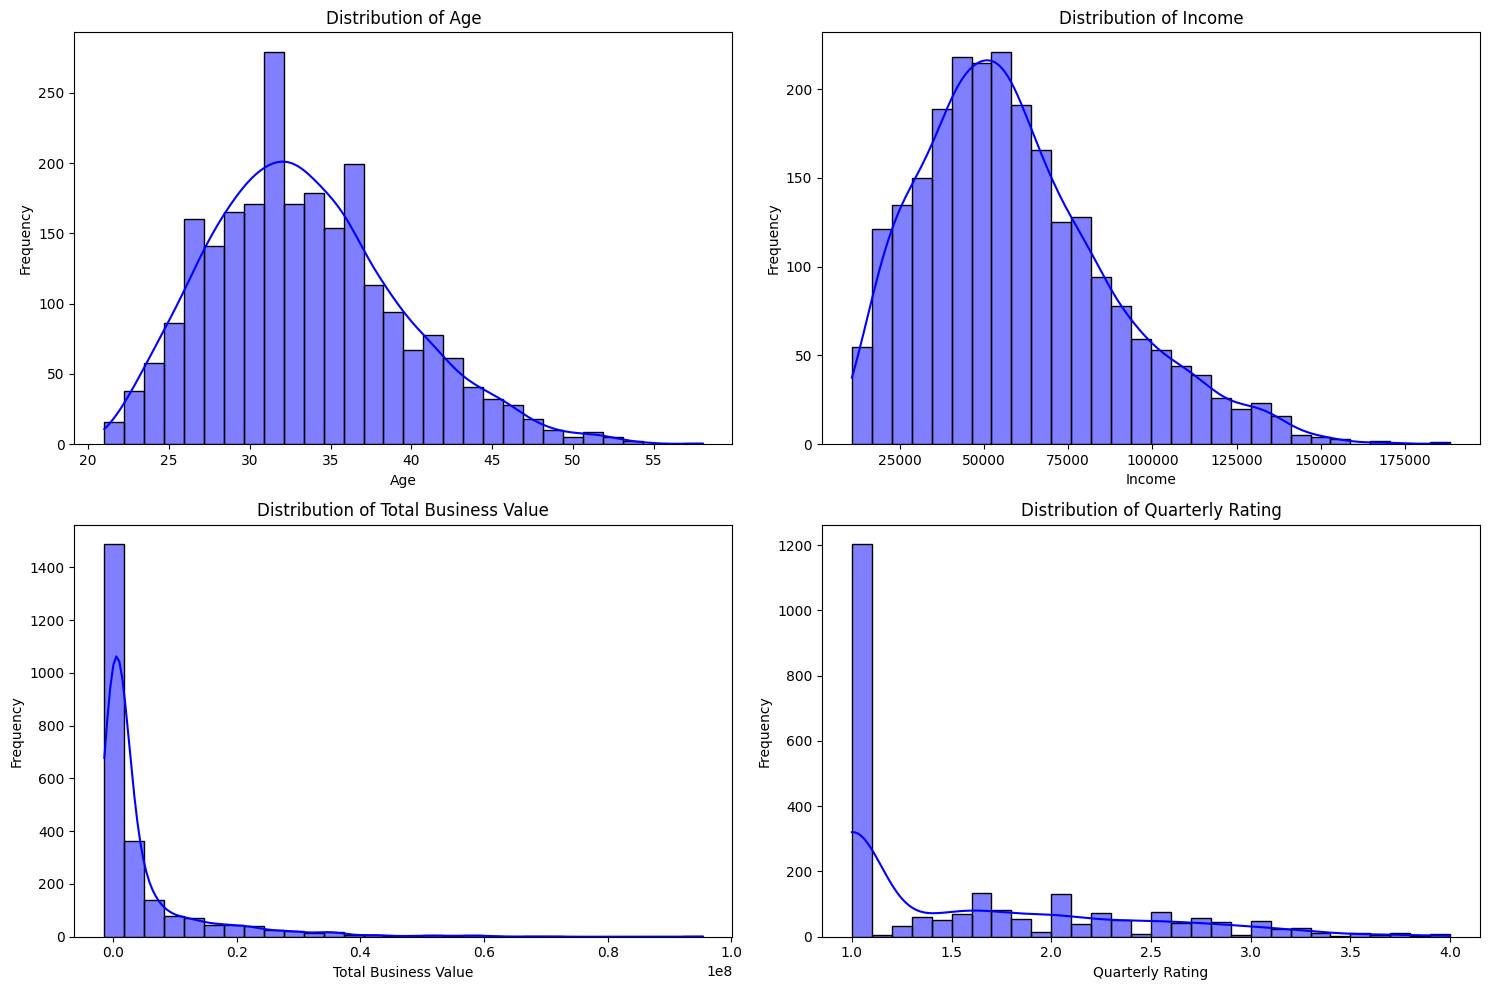

In [25]:
# List of continuous variables in the current dataset
continuous_vars = [
    "Age", "Income", "Total Business Value", "Quarterly Rating"
]

# Number of rows and columns for subplots
n_cols = 2
n_rows = (len(continuous_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=final_aggregated_data, x=var, kde=True, bins=30, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Inference and Recommendation**

> Distribution of Age

- **Inference**: The age distribution is right-skewed, with the majority of individuals falling between the ages of 25 and 40. The peak frequency is around the age of 30.
- **Recommendation**: Target marketing and services towards individuals aged 25-40, as they represent the largest demographic group.

> Distribution of Income

- **Inference**: The income distribution is also right-skewed, with most individuals earning between 25,000 and 75,000. The peak frequency is around 50,000.
- **Recommendation**: Focus financial products and services on individuals earning between 25,000 and 75,000, as they constitute the majority of the population.

> Distribution of Total Business Value

- **Inference**: The distribution of total business value is highly right-skewed, with a significant number of businesses having a low total business value. The majority of businesses have a total business value close to zero.
- **Recommendation**: Provide support and resources to small businesses with low total business value to help them grow and increase their market share.

> Distribution of Quarterly Rating

- **Inference**: The quarterly rating distribution is right-skewed, with most ratings clustered around 1.0. There are fewer businesses with higher ratings.
- **Recommendation**: Implement strategies to improve the quarterly ratings of businesses, such as customer service training and quality improvement programs.

### **Categorical Variables**

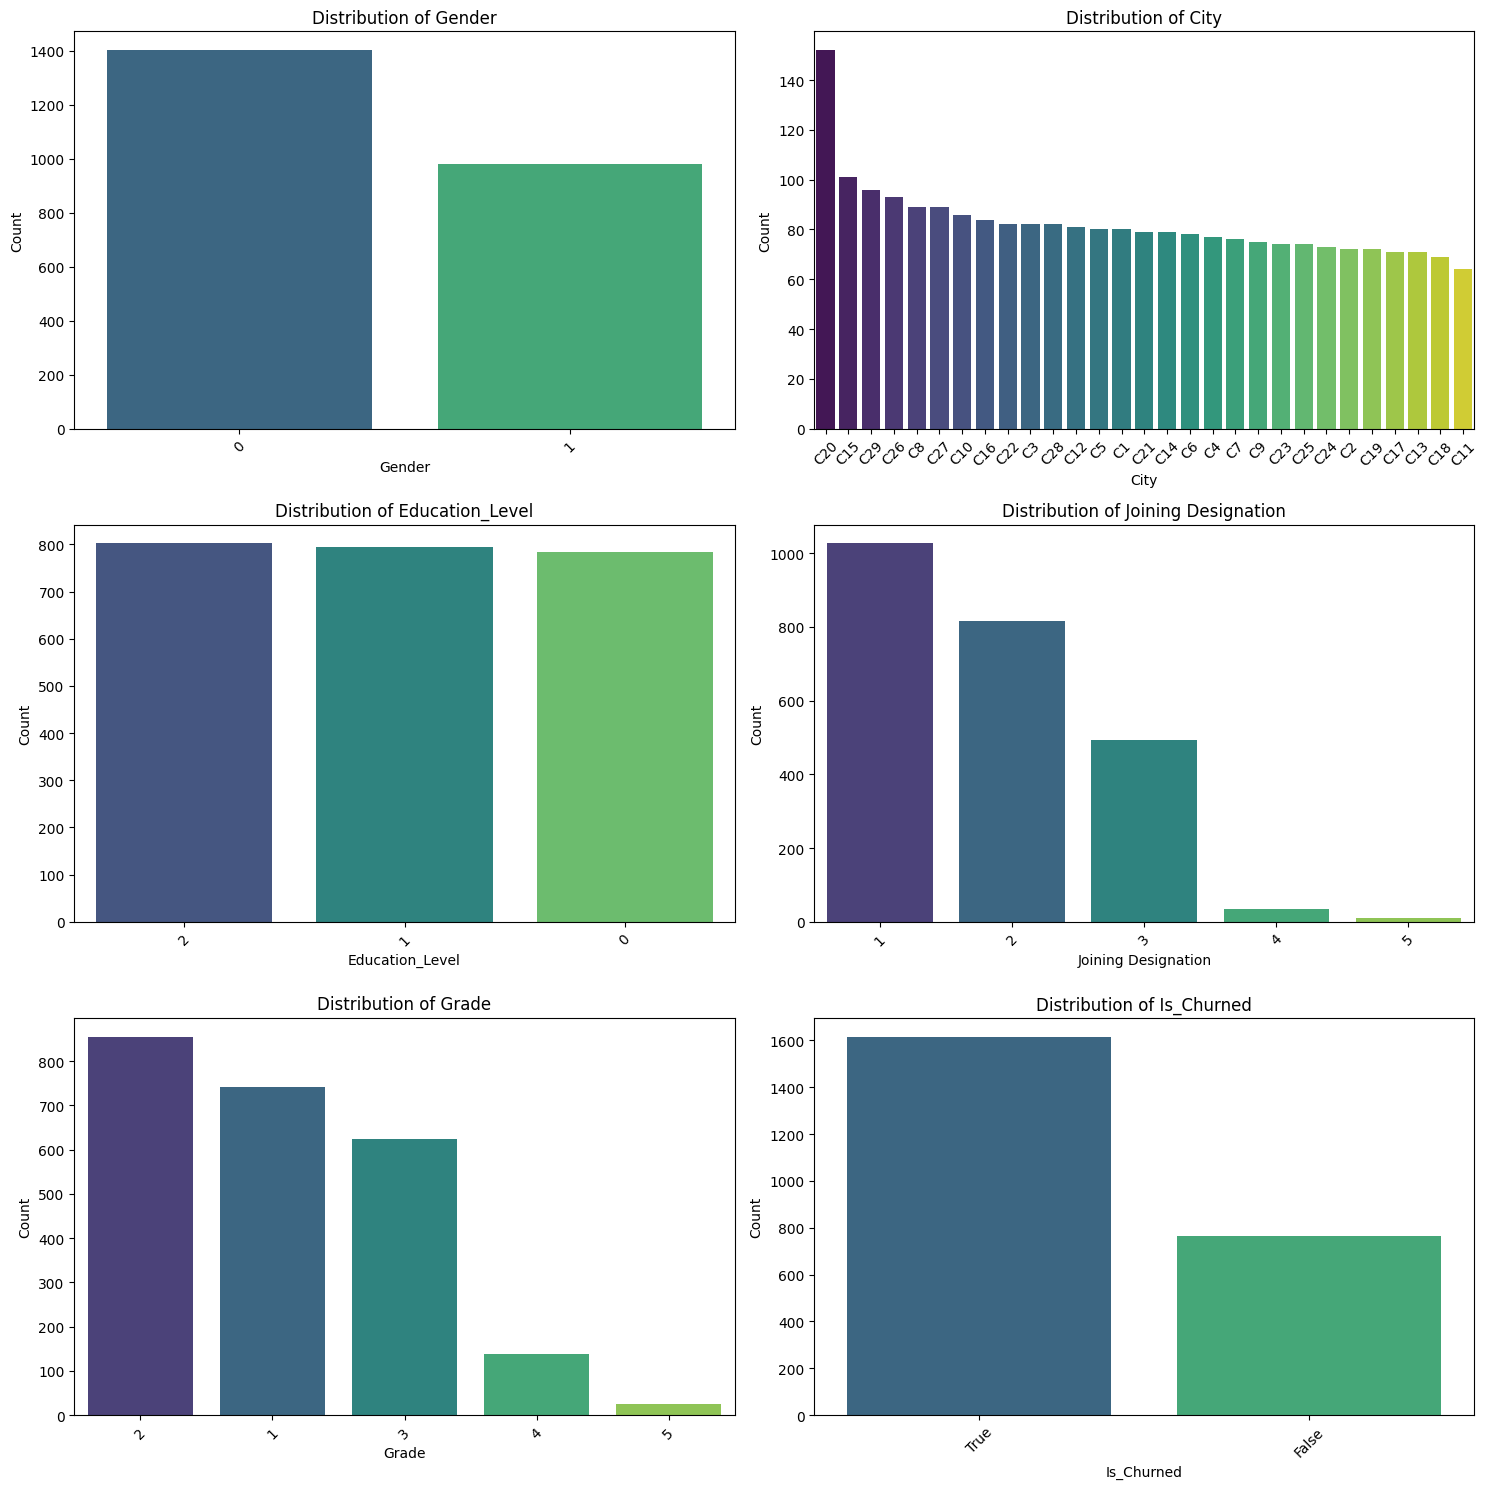

In [26]:
# List of categorical variables
categorical_vars = ["Gender", "City", "Education_Level", "Joining Designation", "Grade", "Is_Churned"]

# Number of rows and columns for subplots
n_cols = 2
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(data=final_aggregated_data, x=var, ax=axes[i], palette="viridis", order=final_aggregated_data[var].value_counts().index)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Inference and Recommendation**

> Distribution of Gender

- **Inference**: The dataset has a higher count of individuals with Gender labeled as '0' compared to '1'.
- **Recommendation**: Ensure gender diversity in the dataset by balancing the representation of different genders.

> Distribution of City

- **Inference**: The distribution of individuals across different cities is uneven, with some cities having significantly higher counts than others.
- **Recommendation**: Investigate the reasons for the uneven distribution and consider strategies to achieve a more balanced representation across cities.

> Distribution of Education Level

- **Inference**: The Education Level attribute is fairly evenly distributed across the three categories.
- **Recommendation**: Maintain the current balance in education levels, but also consider if additional education levels should be included to capture a broader range of educational backgrounds.

> Distribution of Joining Designation

- **Inference**: The majority of individuals joined at designation '1', with decreasing counts for higher designations.
- **Recommendation**: Evaluate the criteria for joining designations and consider if the distribution aligns with organizational goals and employee career progression.

> Distribution of Grade

- **Inference**: Most individuals are in Grade '2', followed by '3', '4', and very few in '5'.
- **Recommendation**: Assess the grading system to ensure it accurately reflects employee performance and potential. Consider providing support and development opportunities for individuals in lower grades.

> Distribution of Is_Churned

- **Inference**: A higher count of individuals have not churned (True) compared to those who have churned (False).
- **Recommendation**: Analyze the factors contributing to churn and implement retention strategies to reduce the churn rate further.


## **Bivariate Analysis**

### **Continuous vs. Continuous**

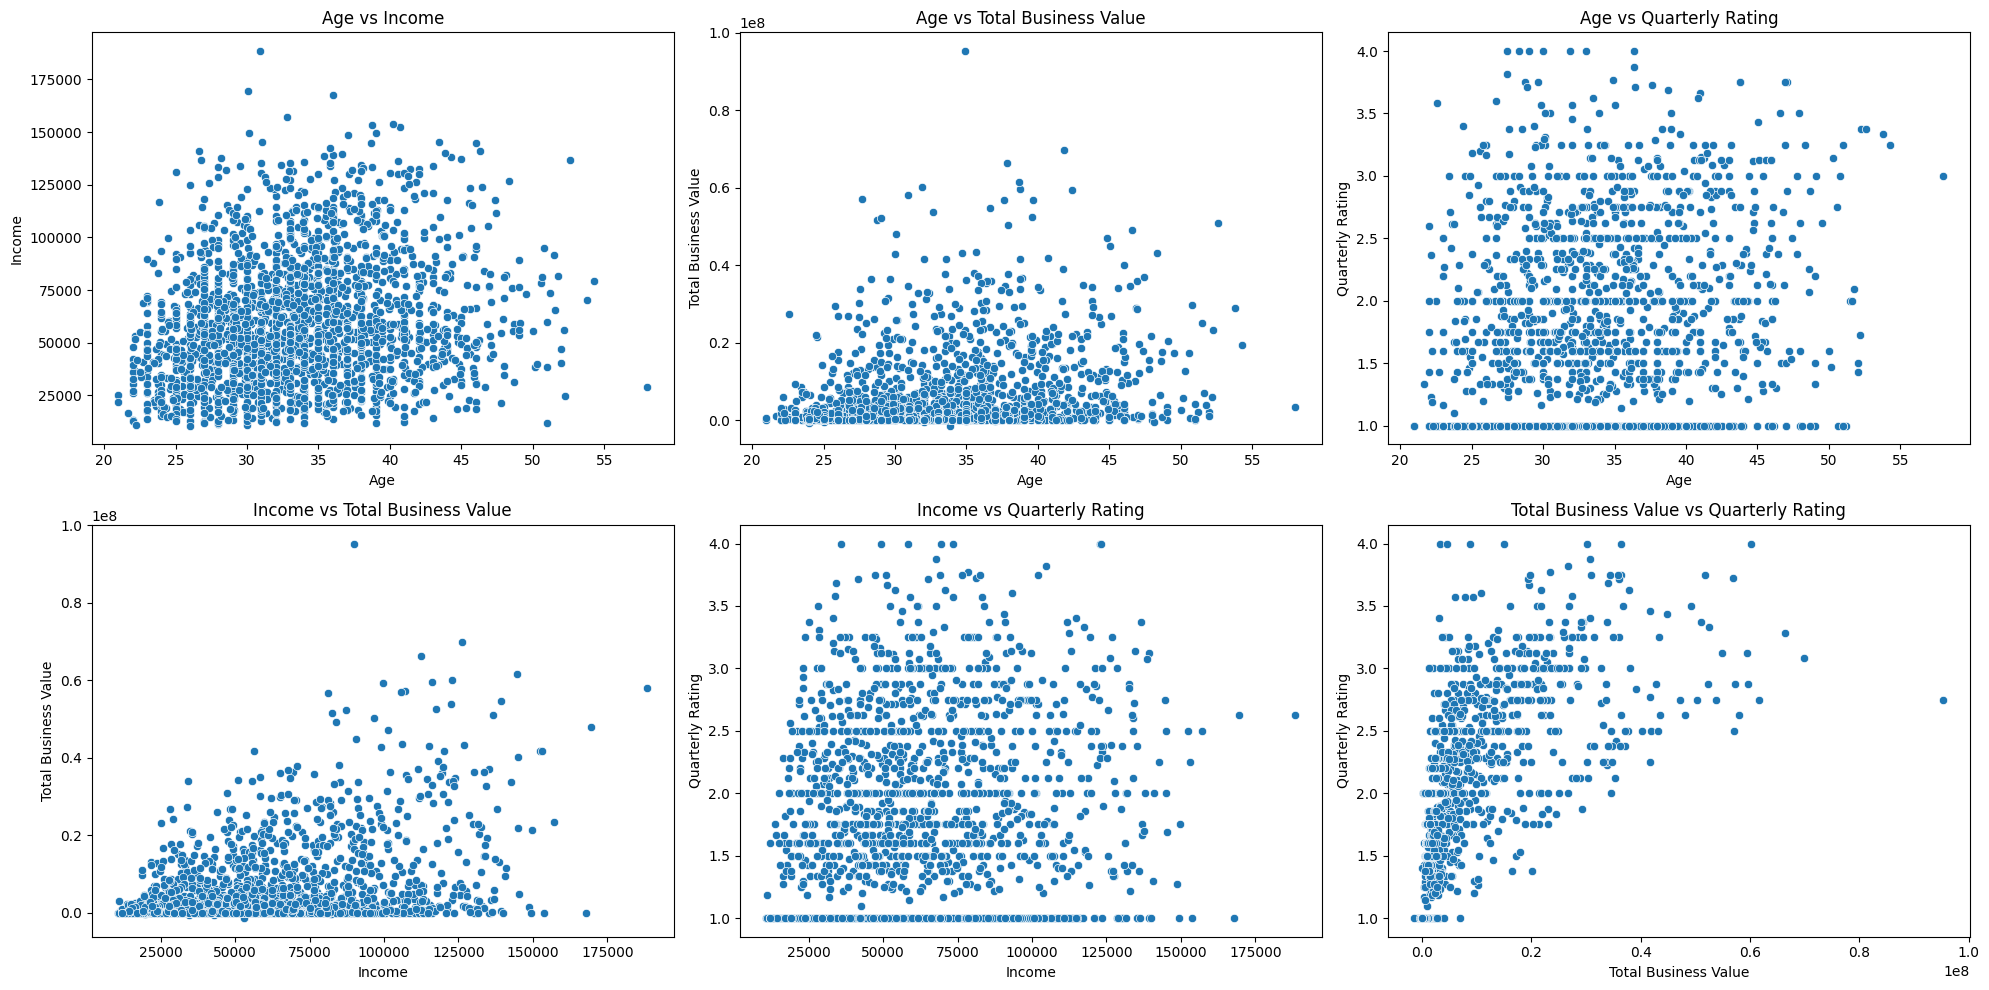

In [27]:
# List of continuous variables in the current dataset
continuous_vars = [
    "Age", "Income", "Total Business Value", "Quarterly Rating"
]

# Number of rows and columns for subplots
n_cols = 3
n_rows = (len(continuous_vars) * (len(continuous_vars) - 1)) // 6

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create pairwise plots for continuous variables
plot_idx = 0
for i in range(len(continuous_vars)):
    for j in range(i + 1, len(continuous_vars)):
        sns.scatterplot(x=final_aggregated_data[continuous_vars[i]], y=final_aggregated_data[continuous_vars[j]], ax=axes[plot_idx])
        axes[plot_idx].set_title(f"{continuous_vars[i]} vs {continuous_vars[j]}")
        axes[plot_idx].set_xlabel(continuous_vars[i])
        axes[plot_idx].set_ylabel(continuous_vars[j])
        plot_idx += 1

# Remove unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Inference and Recommendation**

> Age vs Income

- **Inference**: The scatter plot of Age vs Income shows a positive correlation, indicating that as age increases, income tends to increase as well.
- **Recommendation**: Consider implementing age-specific financial planning and career development programs to help individuals maximize their income potential as they age.

> Age vs Total Business Value

- **Inference**: The scatter plot of Age vs Total Business Value does not show a strong correlation, suggesting that age may not be a significant factor in determining total business value.
- **Recommendation**: Focus on other factors that may influence total business value, such as industry type, business strategy, and market conditions.

> Age vs Quarterly Rating

- **Inference**: The scatter plot of Age vs Quarterly Rating shows no clear correlation, indicating that quarterly ratings are not significantly influenced by age.
- **Recommendation**: Investigate other factors that may impact quarterly ratings, such as customer satisfaction, product quality, and service efficiency.

> Income vs Total Business Value

- **Inference**: The scatter plot of Income vs Total Business Value shows a positive correlation, suggesting that higher income is associated with higher total business value.
- **Recommendation**: Develop programs to support income growth for businesses, such as financial consulting, investment opportunities, and revenue optimization strategies.

> Income vs Quarterly Rating

- **Inference**: The scatter plot of Income vs Quarterly Rating shows no clear correlation, indicating that quarterly ratings are not significantly influenced by income.
- **Recommendation**: Explore other factors that may affect quarterly ratings, such as customer feedback, employee performance, and operational processes.

> Total Business Value vs Quarterly Rating

- **Inference**: The scatter plot of Total Business Value vs Quarterly Rating shows no clear correlation, suggesting that total business value does not significantly impact quarterly ratings.
- **Recommendation**: Focus on improving factors that directly influence quarterly ratings, such as customer experience, product development, and marketing efforts.

### **Categorical vs. Categorical**

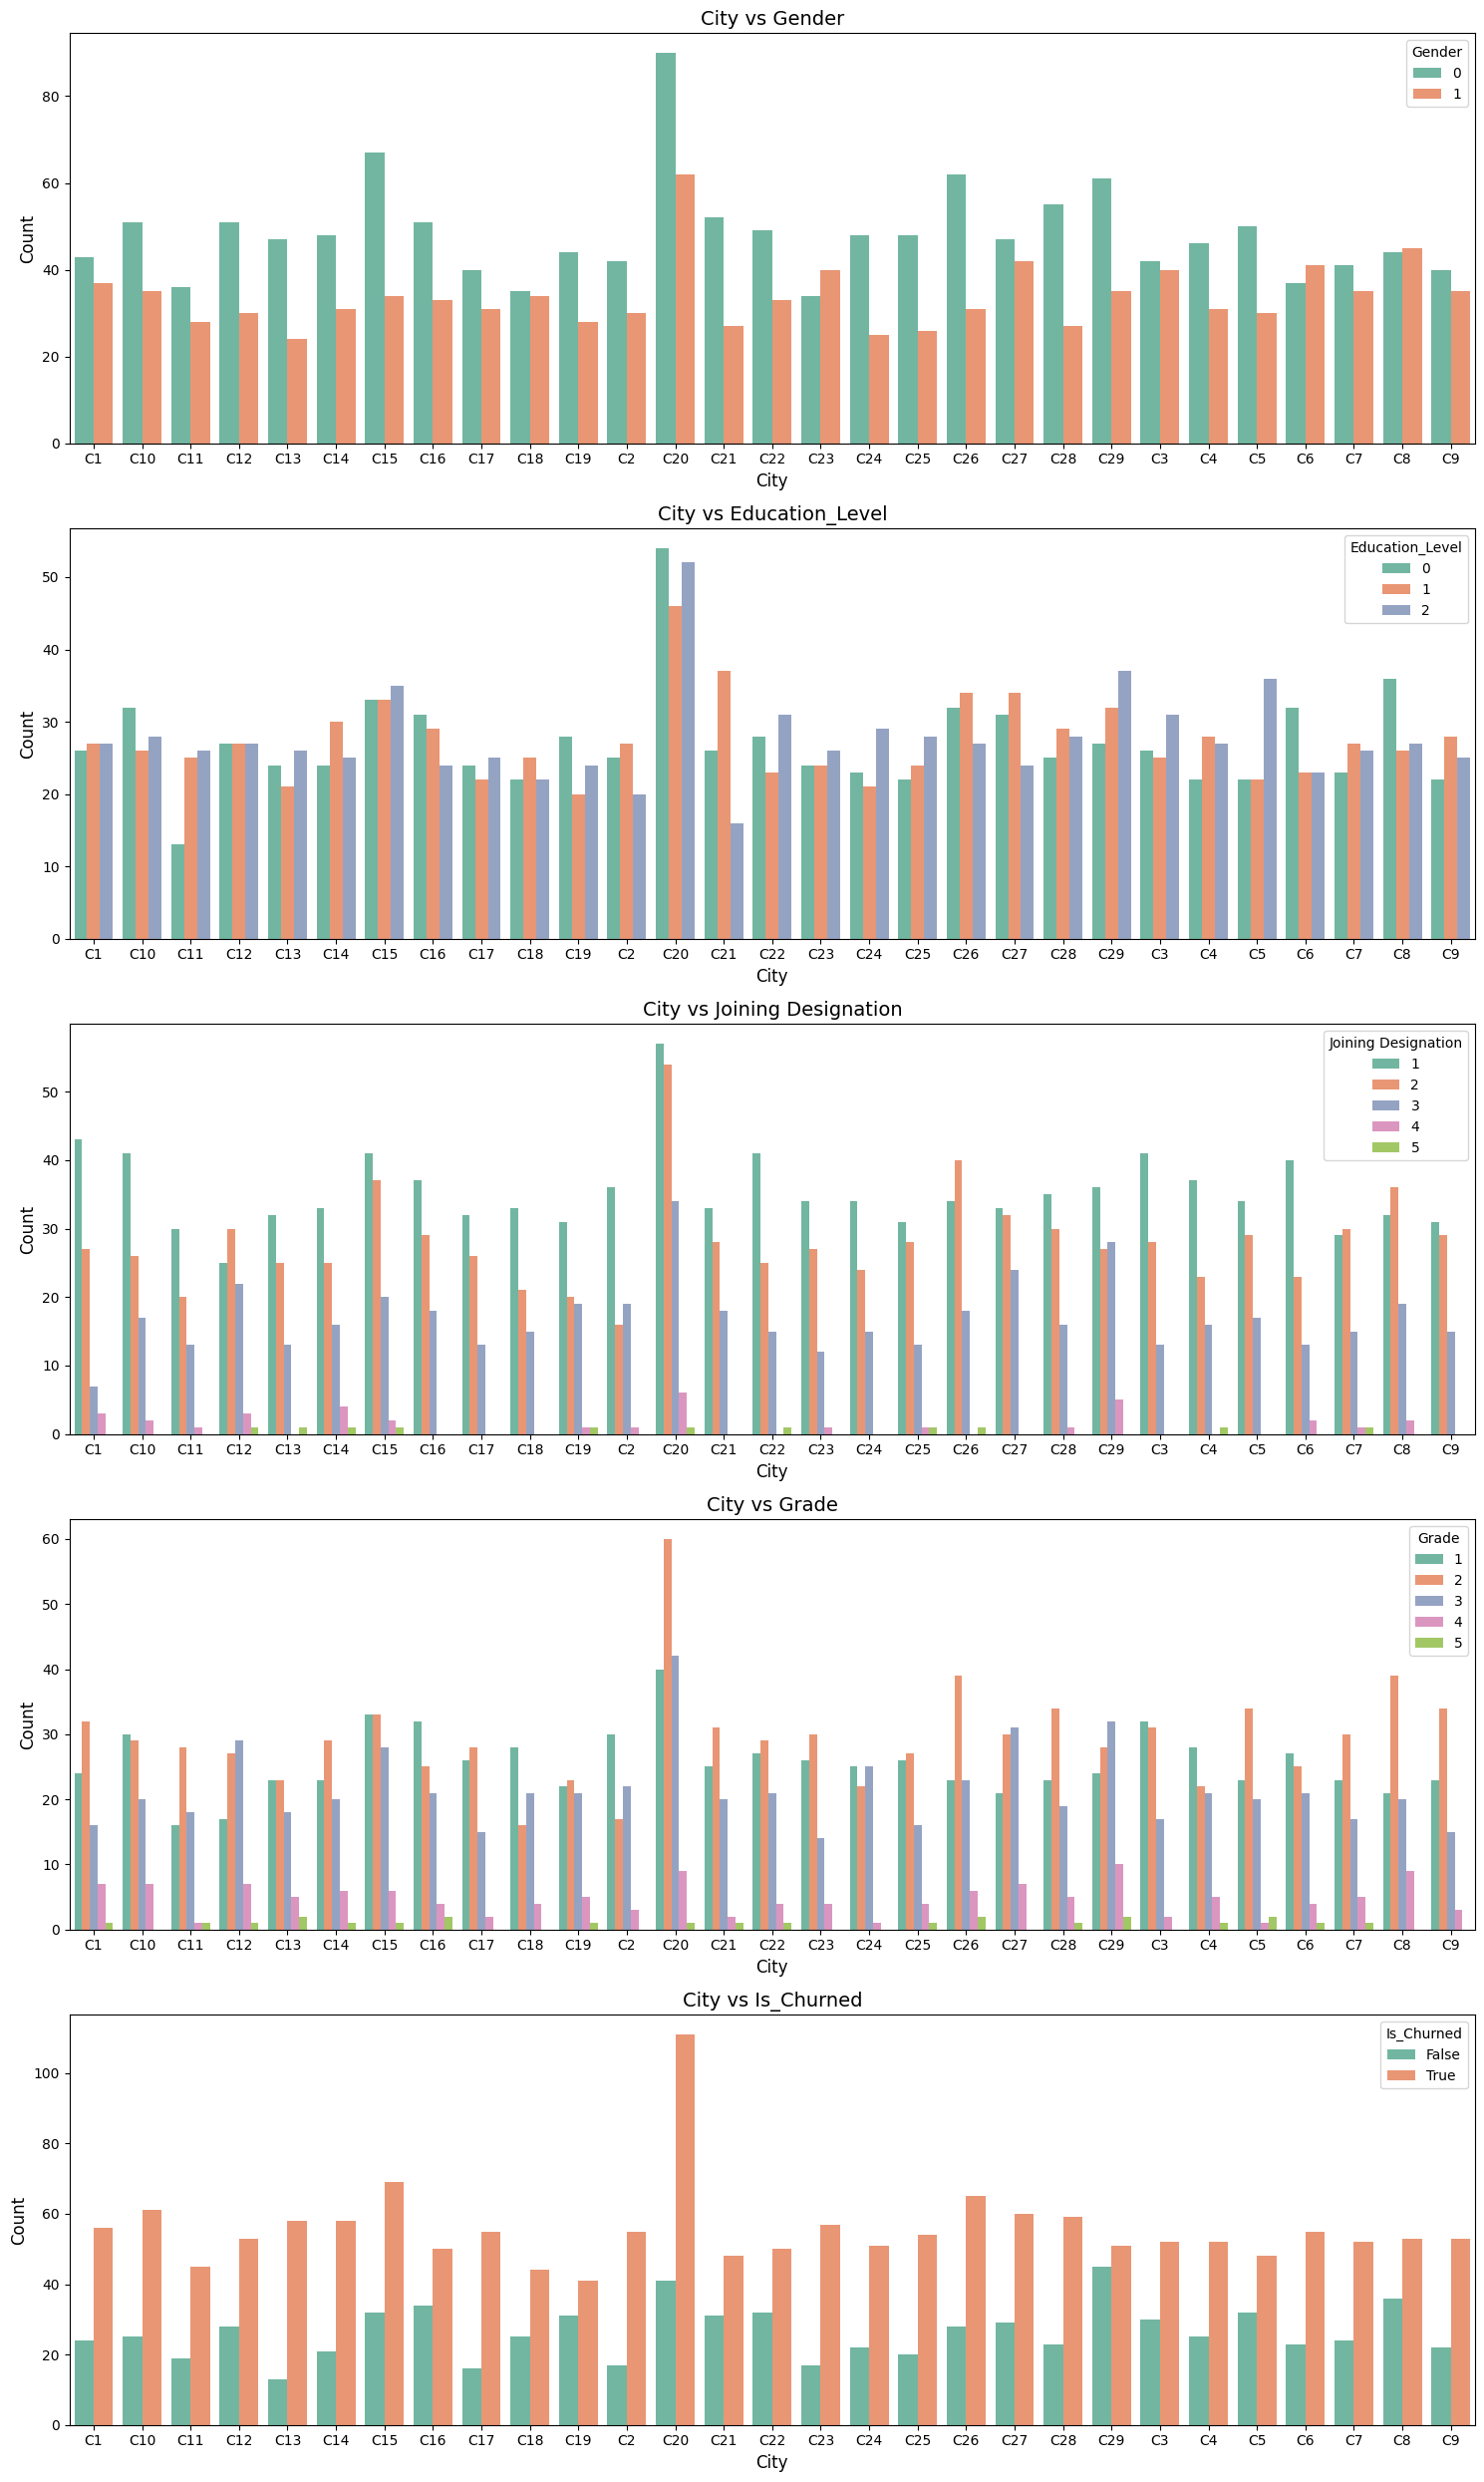

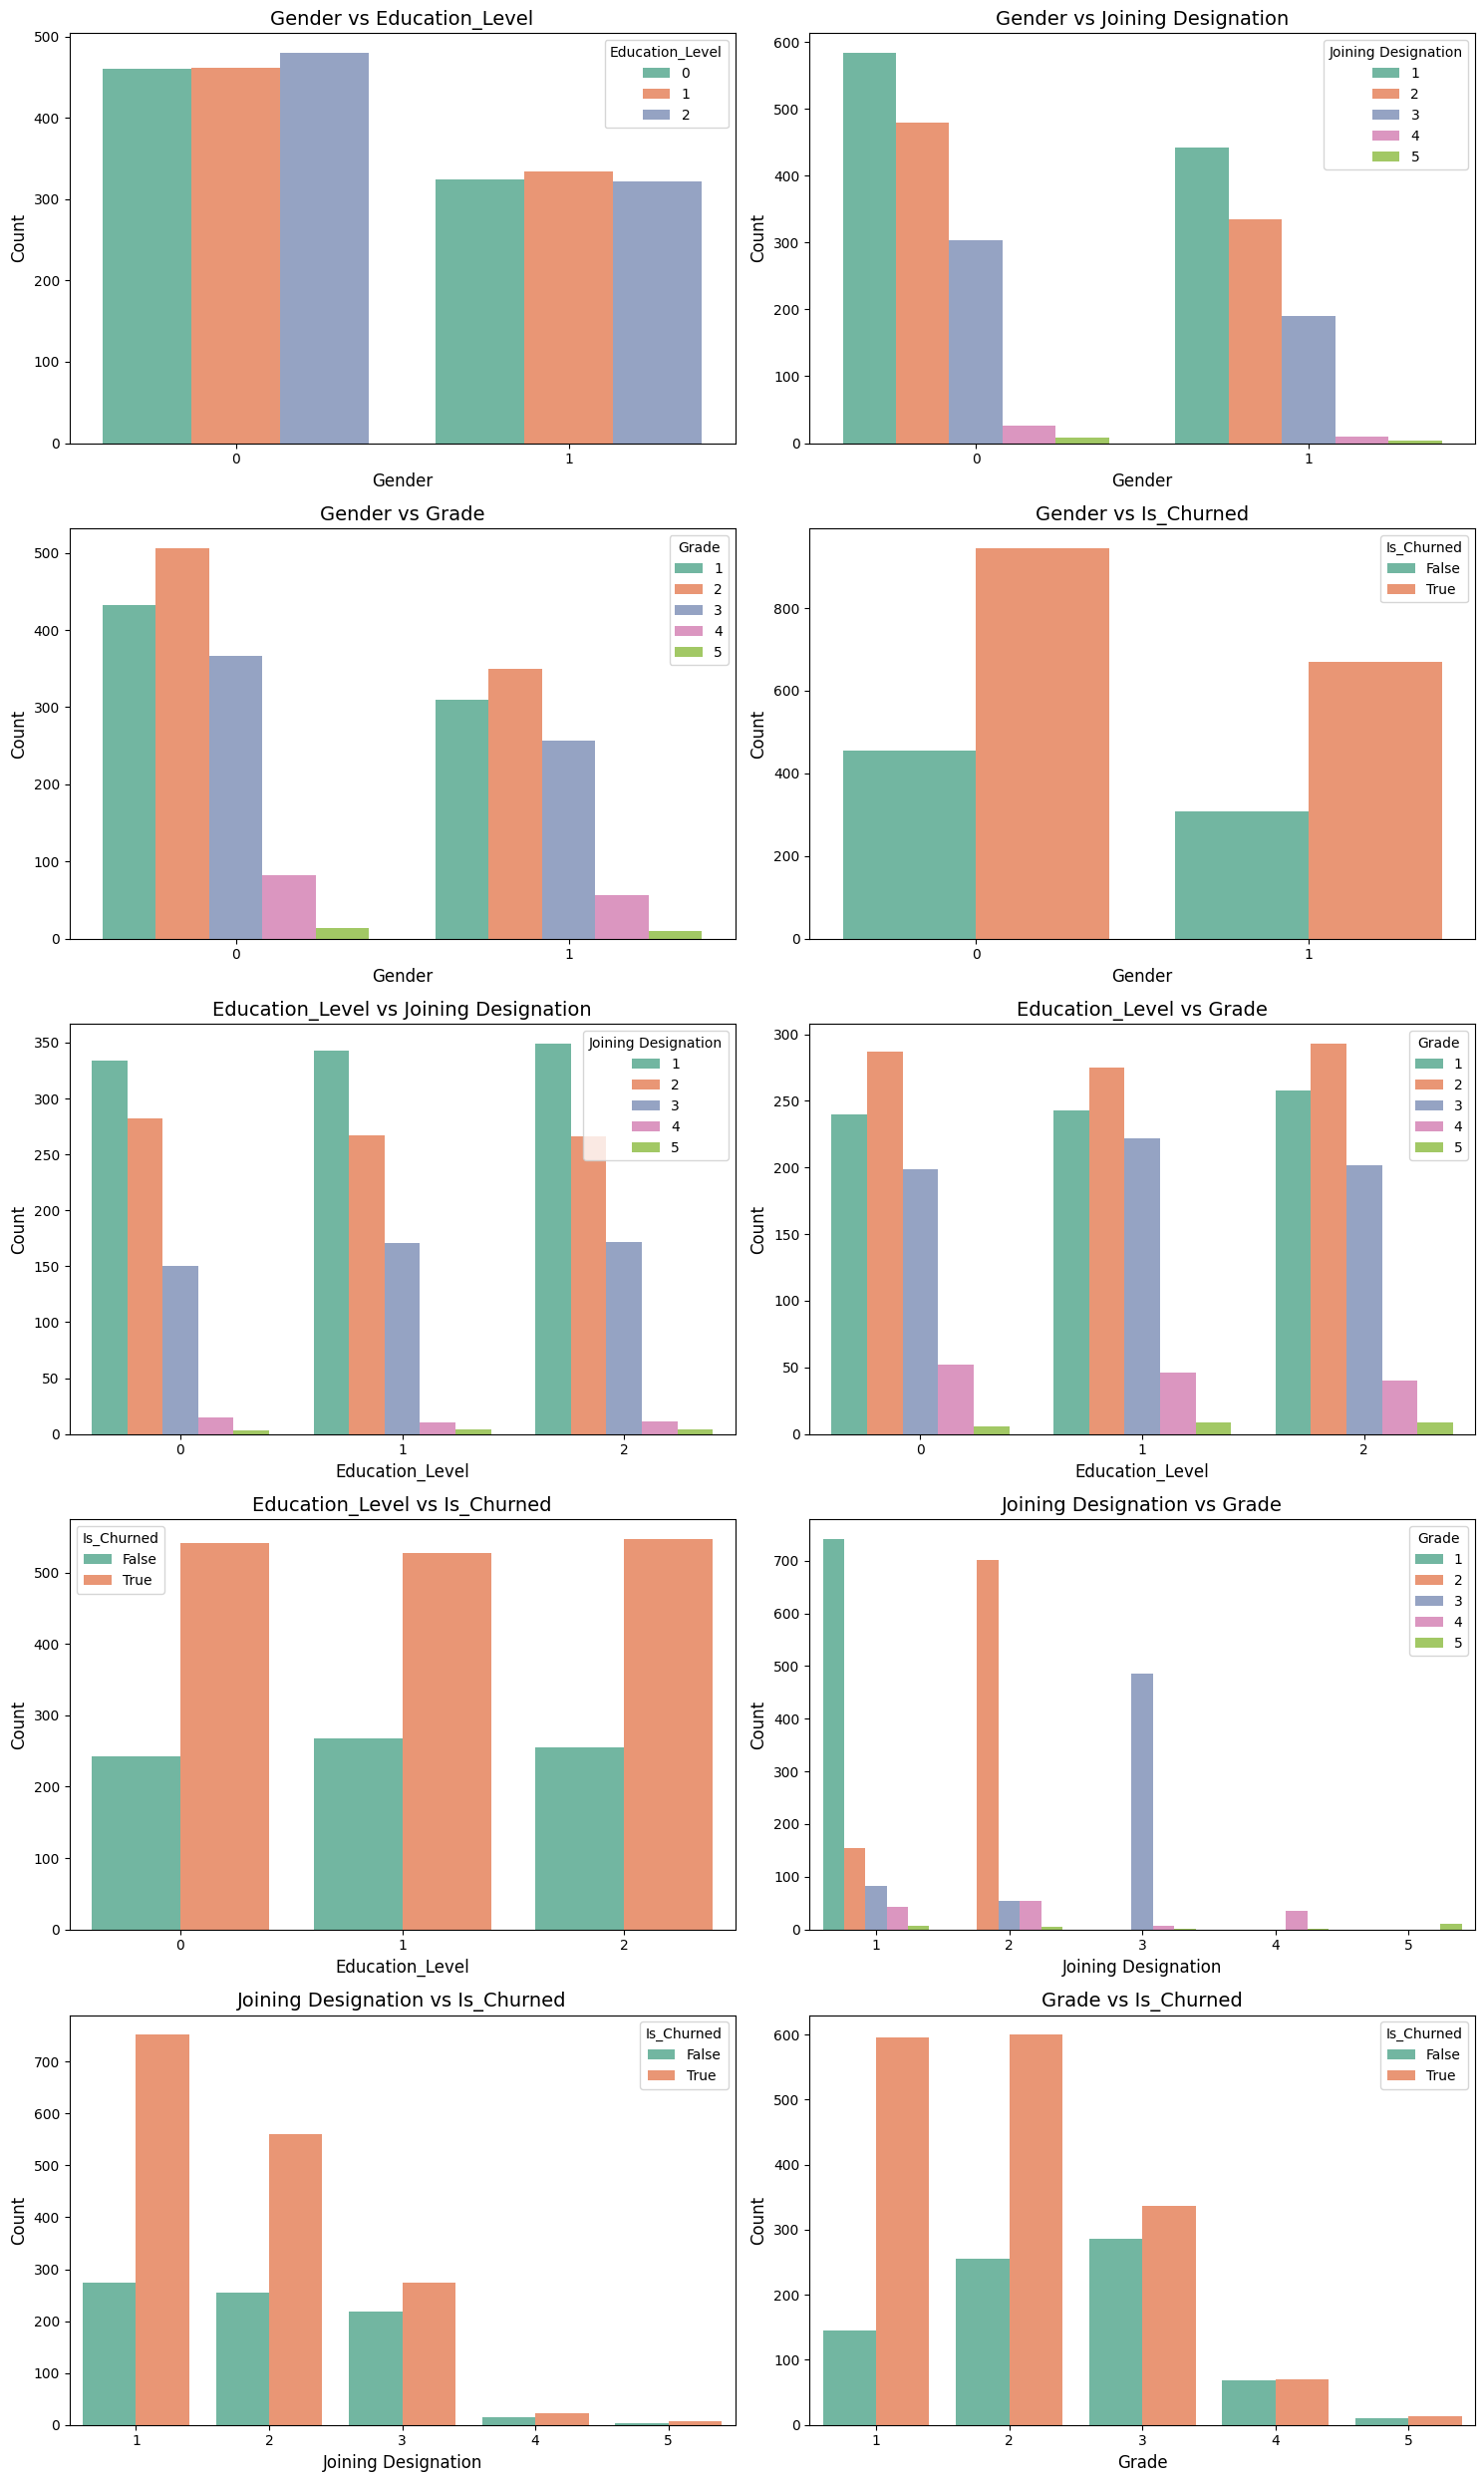

In [28]:
# List of categorical variables in the current dataset
categorical_vars = [
    "City", "Gender", "Education_Level", "Joining Designation", "Grade", "Is_Churned"
]

# Calculate all pairwise combinations of the categorical variables
combinations = list(itertools.combinations(categorical_vars, 2))

# Separate combinations involving "City" and others
city_combinations = [combo for combo in combinations if "City" in combo]
other_combinations = [combo for combo in combinations if "City" not in combo]

# Create subplots for combinations involving "City" (one plot per row)
for combinations_list, n_cols in [(city_combinations, 1), (other_combinations, 2)]:
    # Calculate rows and columns for subplots dynamically
    n_rows = (len(combinations_list) + n_cols - 1) // n_cols  # Calculate rows based on combinations count

    # Create subplots with a larger figure size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten the axes for easy iteration
    axes = axes.flatten()

    # Create count plots
    for plot_idx, (var1, var2) in enumerate(combinations_list):
        # Create the count plot
        sns.countplot(data=final_aggregated_data, x=var1, hue=var2, ax=axes[plot_idx], palette='Set2')

        # Set titles and labels
        axes[plot_idx].set_title(f"{var1} vs {var2}", fontsize=14)
        axes[plot_idx].set_xlabel(var1, fontsize=12)
        axes[plot_idx].set_ylabel("Count", fontsize=12)

    # Remove unused subplots if any
    for j in range(len(combinations_list), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


#### **Inference and Recommendation**

> **City vs Gender**

- **Inference**: The distribution of gender (0: Male, 1: Female) varies across cities, with some cities like C8 having a higher female population compared to others.
- **Recommendation**: Tailor policies and workplace inclusivity programs to ensure gender balance, especially in cities with notable disparities.

> **City vs Education Level**

- **Inference**: Education levels (0: Basic, 1: Intermediate, 2: Advanced) are distributed unevenly across cities, with some cities showing a concentration of employees with advanced education levels.
- **Recommendation**: Leverage cities with higher education levels for roles requiring specialized skills.

> **City vs Joining Designation**

- **Inference**: Different joining designations (1 to 5) are concentrated in specific cities, with cities like C20 having a higher representation across various designations.
- **Recommendation**: Use cities with diverse designation distributions as hubs for cross-functional teams or leadership development programs.

> **City vs Grade**

- **Inference**: The distribution of grades (1 to 5) varies by city, with some cities like C20 showing a higher number of employees in higher grades.
- **Recommendation**: Focus on cities with higher grades for critical projects and provide training opportunities in cities with lower-grade distributions.

> **City vs Is_Churned**

- **Inference**: Employee churn is higher in certain cities like C20, indicating potential dissatisfaction or external factors influencing retention.
- **Recommendation**: Conduct detailed surveys in cities with high churn rates to identify issues and implement retention strategies, such as better incentives or work-life balance initiatives.

> **Gender vs Education Level**

- **Inference**: Males (Gender = 0) and females (Gender = 1) have similar distributions across education levels (0: Basic, 1: Intermediate, 2: Advanced), with a slightly higher count of males in advanced education levels.
- **Recommendation**: Promote equal opportunities for education advancement, particularly for females, to achieve a more balanced workforce.

> **Gender vs Joining Designation**

- **Inference**: Males dominate higher joining designations (e.g., 3, 4, and 5), whereas females are more concentrated in lower designations (1 and 2).
- **Recommendation**: Encourage leadership training and mentoring programs for females to improve representation in higher designations.

> **Gender vs Grade**

- **Inference**: Males are more prevalent in higher grades, while females are concentrated in lower grades.
- **Recommendation**: Create skill development and grade promotion programs to enhance female representation in higher grades.

> **Gender vs Is_Churned**

- **Inference**: Both genders show significant churn, but males have a higher churn rate compared to females.
- **Recommendation**: Investigate reasons for male churn and implement retention strategies such as flexible work options and better career growth pathways.

> **Education Level vs Joining Designation**

- **Inference**: Employees with advanced education (2) tend to occupy higher designations (e.g., 3, 4, 5), while basic education (0) is concentrated in lower designations.
- **Recommendation**: Focus on recruiting highly educated individuals for roles requiring higher designations and provide upskilling opportunities for existing employees.

> **Education Level vs Grade**

- **Inference**: Advanced education levels correlate with higher grades, while lower education levels are more concentrated in lower grades.
- **Recommendation**: Invest in continuous education and certification programs to enable career progression across all grades.

> **Education Level vs Is_Churned**

- **Inference**: Churn rates are relatively high across all education levels, with no significant variation.
- **Recommendation**: Implement universal employee engagement programs focusing on job satisfaction, regardless of education level.

> **Joining Designation vs Grade**

- **Inference**: Higher grades are typically associated with higher joining designations, while lower grades are concentrated in designations 1 and 2.
- **Recommendation**: Provide structured career progression paths from lower designations to motivate employees and reduce stagnation.

> **Joining Designation vs Is_Churned**

- **Inference**: Churn is notably high for lower joining designations (1 and 2), while it decreases for higher designations.
- **Recommendation**: Focus on retention initiatives for lower designation employees, such as role enrichment and better compensation.

> **Grade vs Is_Churned**

- **Inference**: Churn is highest among employees in lower grades (1 and 2), while it decreases for higher grades.
- **Recommendation**: Improve support systems and growth opportunities for employees in lower grades to reduce churn.


### **Categorical vs. Continuous**

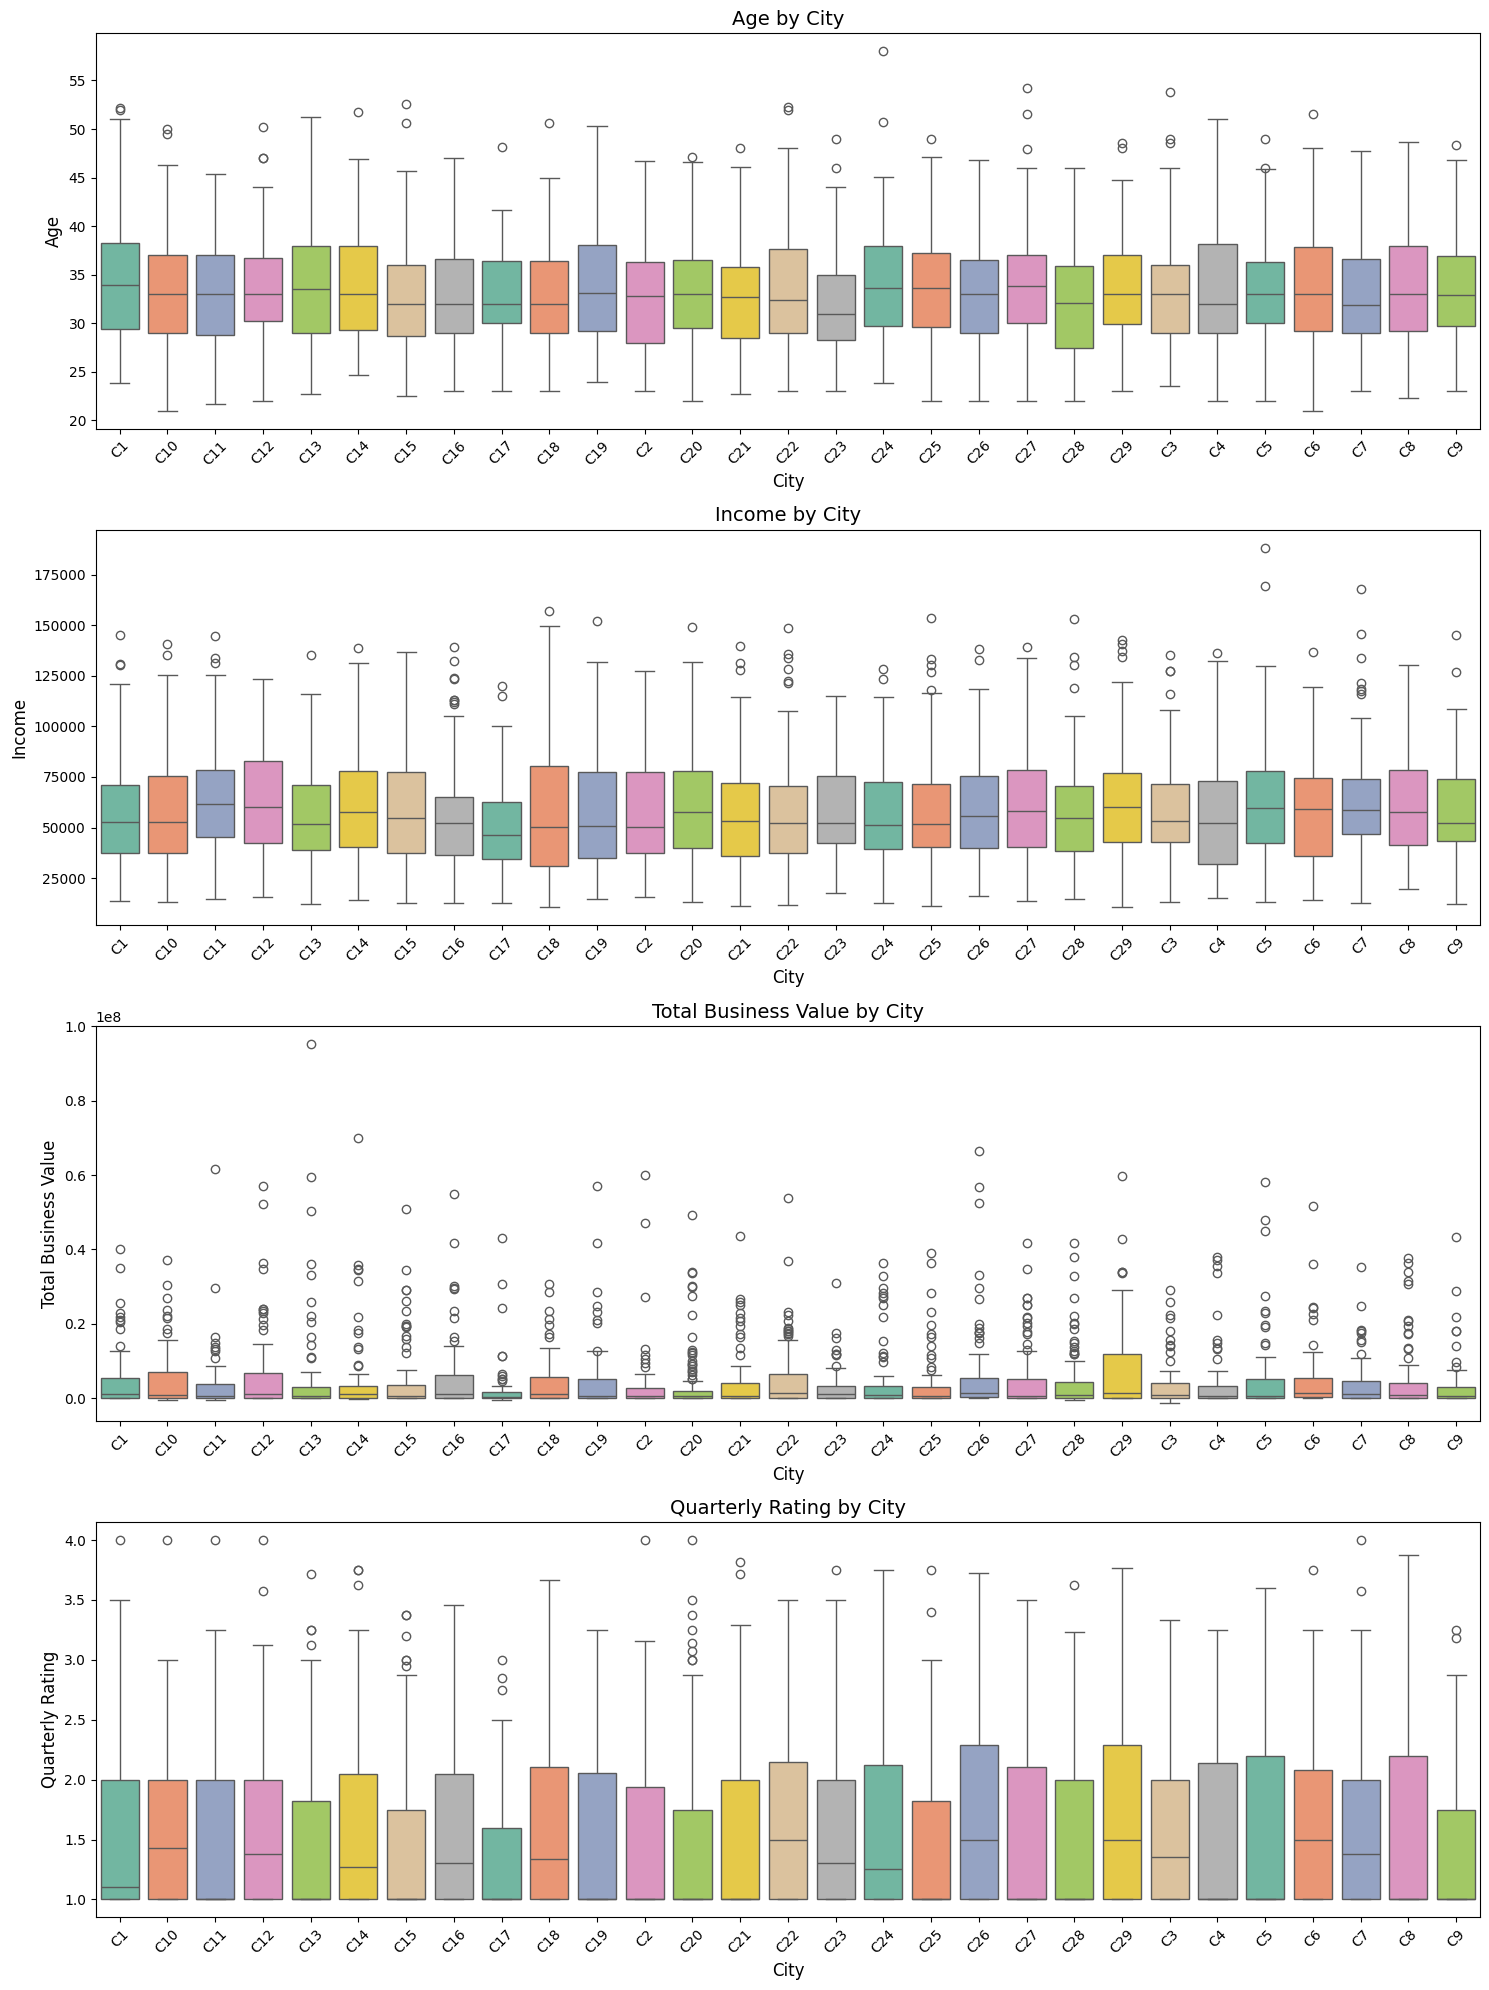

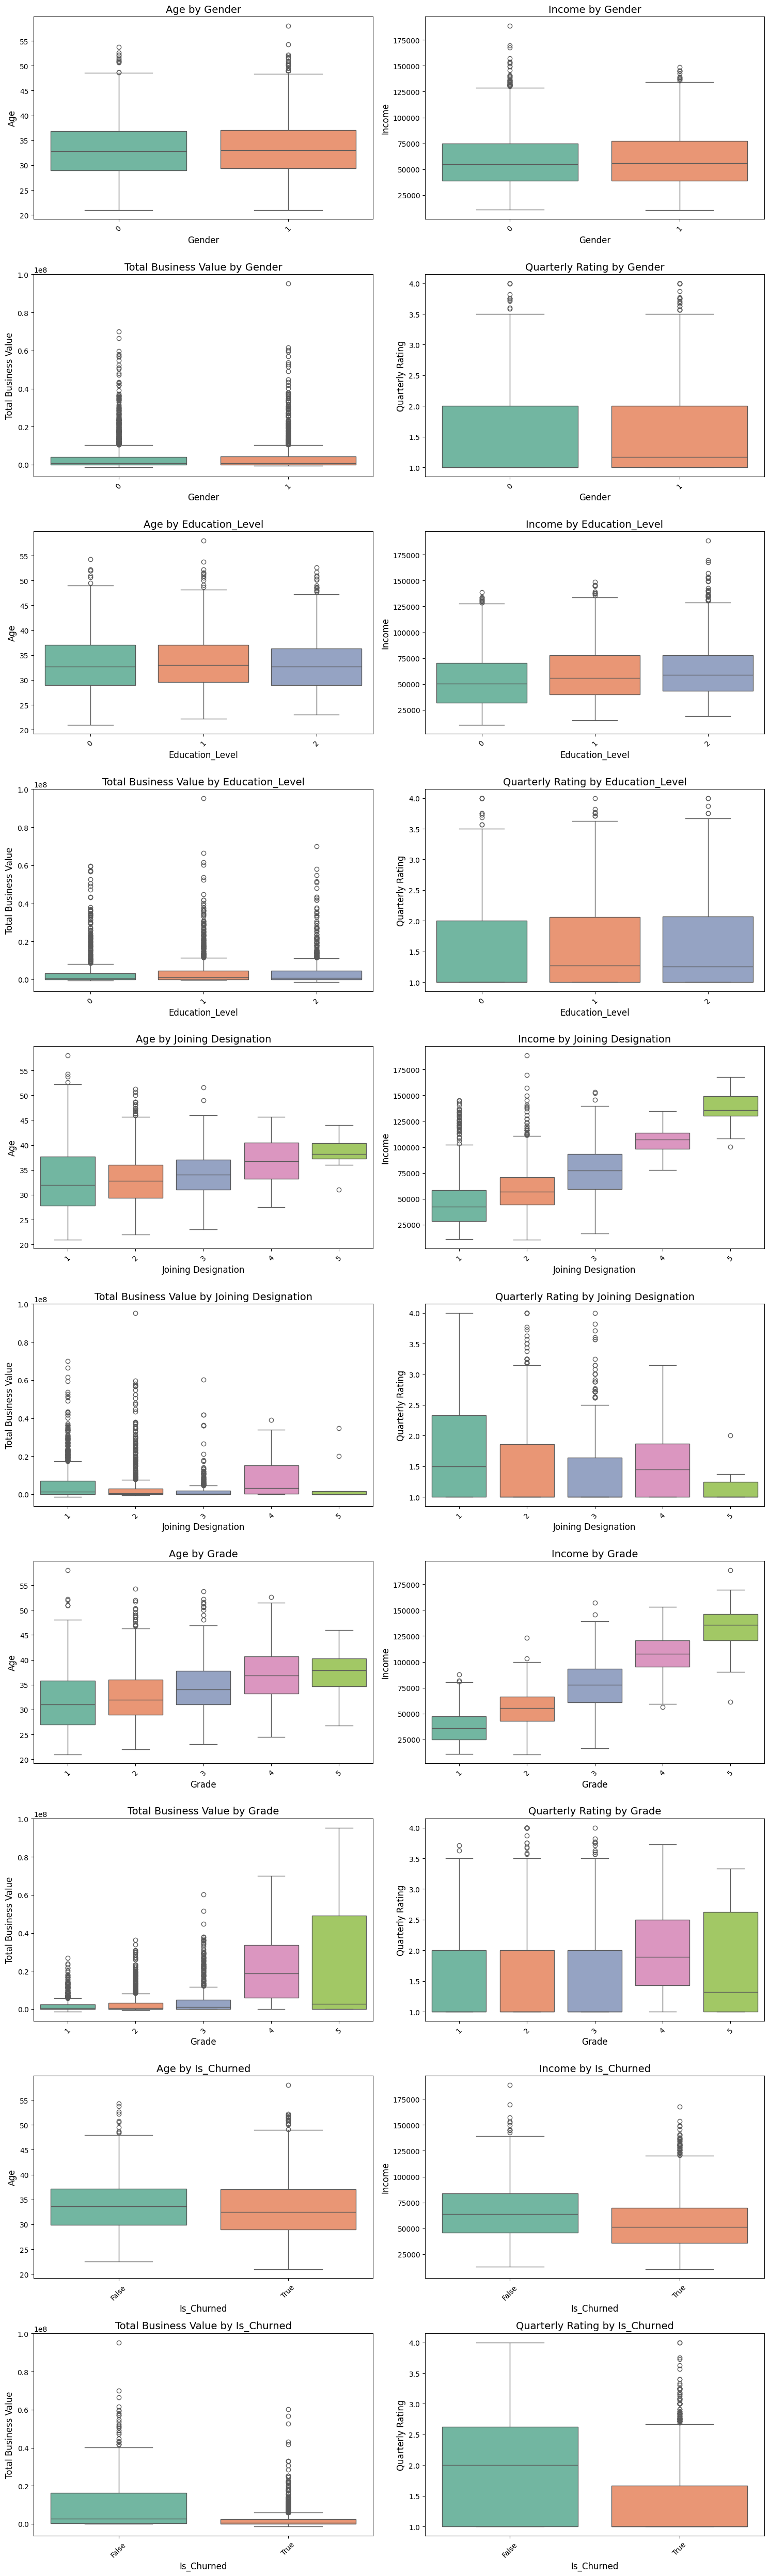

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Lists of categorical and continuous variables
categorical_vars = [
    "City", "Gender", "Education_Level", "Joining Designation", "Grade", "Is_Churned"
]
continuous_vars = ["Age", "Income", "Total Business Value", "Quarterly Rating"]

# Generate combinations of categorical and continuous variables
combinations = list(itertools.product(categorical_vars, continuous_vars))

# Separate combinations involving "City" (1 plot per row) from others (2 plots per row)
city_combinations = [combo for combo in combinations if combo[0] == "City"]
other_combinations = [combo for combo in combinations if combo[0] != "City"]

# Create function to plot based on dynamic layout
def plot_combinations(combinations_list, n_cols):
    n_rows = (len(combinations_list) + n_cols - 1) // n_cols  # Calculate required rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), squeeze=False)
    axes = axes.flatten()  # Flatten axes for iteration

    for plot_idx, (cat_var, cont_var) in enumerate(combinations_list):
        sns.boxplot(data=final_aggregated_data, x=cat_var, y=cont_var, ax=axes[plot_idx], palette="Set2")
        axes[plot_idx].set_title(f"{cont_var} by {cat_var}", fontsize=14)
        axes[plot_idx].set_xlabel(cat_var, fontsize=12)
        axes[plot_idx].set_ylabel(cont_var, fontsize=12)
        axes[plot_idx].tick_params(axis="x", rotation=45)

    # Remove unused subplots
    for i in range(len(combinations_list), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Plot for City combinations (1 plot per row)
plot_combinations(city_combinations, n_cols=1)

# Plot for other combinations (2 plots per row)
plot_combinations(other_combinations, n_cols=2)

#### **Inference and Recommendation**

> **Age Distribution by City**

- **Inference**: The age distribution varies significantly across cities, with some cities having younger populations (lower median age) and others having older populations (higher median age). Cities like C1 and C2 have relatively younger populations compared to cities like C19 and C20.
- **Recommendation**: Tailor services, products, and marketing strategies to the age demographics of each city. For cities with younger populations, focus on products and services that cater to younger age groups. For cities with older populations, prioritize products and services that cater to older age groups.

> **Income Distribution by City**

- **Inference**: The income distribution shows considerable variation across cities. Some cities, like C5 and C8, have higher median incomes, while others, like C12 and C15, have lower median incomes.
- **Recommendation**: Develop income-specific strategies for each city. For cities with higher median incomes, offer premium products and services. For cities with lower median incomes, provide affordable options and financial assistance programs.

> **Total Business Value by City**

- **Inference**: The total business value distribution indicates that some cities, such as C3 and C10, have businesses with higher overall values, while cities like C6 and C11 have businesses with lower overall values.
- **Recommendation**: Support business growth in cities with lower total business values by providing incentives, grants, and resources. In cities with higher total business values, focus on sustaining and enhancing business performance through advanced business solutions and innovation.

> **Quarterly Rating Distribution by City**

- **Inference**: The quarterly rating distribution shows variation across cities, with some cities like C4 and C7 having higher median quarterly ratings and others like C9 and C14 having lower median ratings.
- **Recommendation**: Implement quality improvement programs and customer feedback mechanisms in cities with lower quarterly ratings to enhance business performance. For cities with higher quarterly ratings, maintain high standards and recognize exemplary performance.

> **Age by Gender**

- **Inference**: The age distribution is relatively similar between genders, with both exhibiting a median age of around 30–35 years.
- **Recommendation**: Maintain unbiased age-related policies for both genders and ensure equal opportunities for professional development.

> **Income by Gender**

- **Inference**: Males (Gender = 0) exhibit slightly higher median income levels than females (Gender = 1).
- **Recommendation**: Address gender income disparity by reviewing pay structures and ensuring equal pay for equal roles and contributions.

> **Total Business Value by Gender**

- **Inference**: Males tend to contribute more to total business value on average than females.
- **Recommendation**: Identify and bridge skill gaps for females through training to enhance their contribution to business performance.

> **Quarterly Rating by Gender**

- **Inference**: Gender does not show a significant impact on quarterly ratings; the median ratings are consistent across genders.
- **Recommendation**: Continue evaluating performance based on merit and avoid any potential gender biases.

> **Age by Education Level**

- **Inference**: Higher education levels (2) tend to be associated with slightly older employees, while lower levels (0) are common among younger employees.
- **Recommendation**: Encourage younger employees to pursue advanced education through incentives and scholarships.

> **Income by Education Level**

- **Inference**: Income increases with education level, with employees at education level 2 earning the highest median income.
- **Recommendation**: Promote education advancement among employees to enable better earning potential and productivity.

> **Total Business Value by Education Level**

- **Inference**: Employees with higher education levels tend to contribute more to business value.
- **Recommendation**: Focus recruitment on individuals with advanced education and provide upskilling opportunities for existing employees.

> **Quarterly Rating by Education Level**

- **Inference**: Higher education levels are correlated with slightly better quarterly ratings, though the variation is minimal.
- **Recommendation**: Recognize and reward performance irrespective of education level to maintain a fair environment.

> **Age by Joining Designation**

- **Inference**: Higher joining designations (e.g., 4 and 5) are associated with older employees, while lower designations attract younger employees.
- **Recommendation**: Provide mentoring programs for younger employees in lower designations to prepare them for higher roles.

> **Income by Joining Designation**

- **Inference**: Income increases with joining designation, with higher designations earning significantly more.
- **Recommendation**: Create structured career paths to help employees in lower designations progress to higher income levels.

> **Total Business Value by Joining Designation**

- **Inference**: Employees in higher designations contribute more to total business value.
- **Recommendation**: Provide leadership and business training to lower designation employees to enhance their contributions.

> **Quarterly Rating by Joining Designation**

- **Inference**: Higher designations tend to receive slightly better quarterly ratings.
- **Recommendation**: Continue rewarding performance based on contribution while supporting underperforming designations.

> **Age by Grade**

- **Inference**: Higher grades are associated with slightly older employees, while lower grades have a younger age distribution.
- **Recommendation**: Facilitate professional development for younger employees to enable their transition to higher grades.

> **Income by Grade**

- **Inference**: Income increases significantly with grade, reflecting higher responsibility and expertise.
- **Recommendation**: Use income growth as a motivation for employees in lower grades and support their career advancement.

> **Total Business Value by Grade**

- **Inference**: Employees in higher grades contribute significantly more to business value than those in lower grades.
- **Recommendation**: Provide targeted training to employees in lower grades to boost their contribution to business performance.

> **Quarterly Rating by Grade**

- **Inference**: Higher grades correlate with slightly better quarterly ratings.
- **Recommendation**: Maintain performance evaluation systems and offer support for employees in lower grades.

> **Age by Is_Churned**

- **Inference**: Churned employees tend to have a slightly younger age distribution compared to retained employees.
- **Recommendation**: Introduce retention initiatives focusing on younger employees, such as mentorship programs and growth opportunities.

> **Income by Is_Churned**

- **Inference**: Churned employees have a slightly lower median income compared to retained employees.
- **Recommendation**: Improve compensation packages for roles prone to churn to enhance employee retention.

> **Total Business Value by Is_Churned**

- **Inference**: Retained employees contribute significantly more to total business value than those who have churned.
- **Recommendation**: Focus retention strategies on high-performing employees to safeguard business performance.

> **Quarterly Rating by Is_Churned**

- **Inference**: Retained employees have higher quarterly ratings compared to those who have churned.
- **Recommendation**: Use performance ratings as an indicator to identify employees at risk of churning and address their concerns proactively.


## **Correlation Analysis**

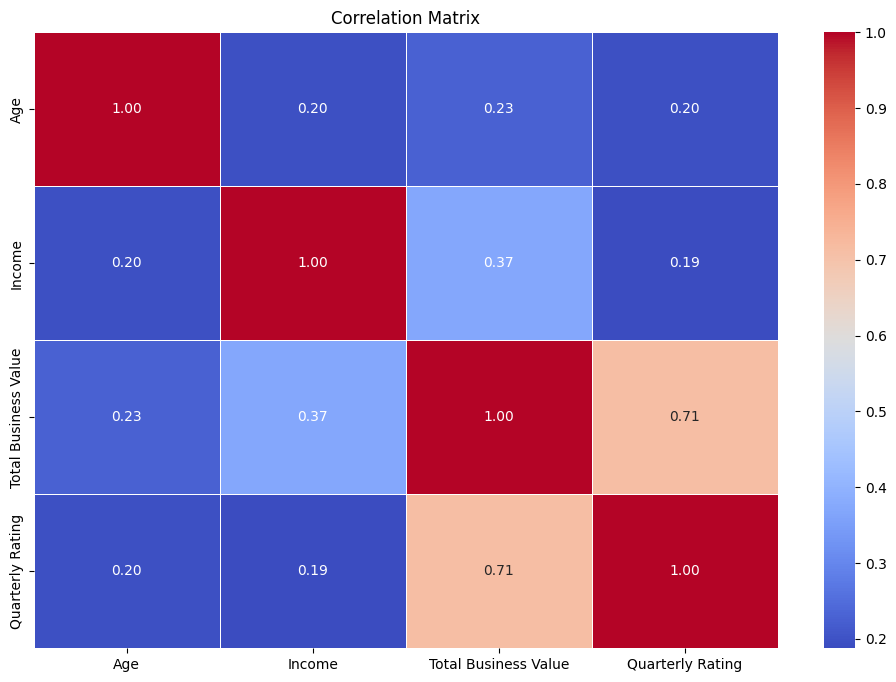

In [30]:
# Select only numeric columns from the DataFrame
numeric_columns = final_aggregated_data[continuous_vars]

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Inference and Recommendation**

> Age

- **Inference**: Age has a weak positive correlation with Income (0.20), Total Business Value (0.23), and Quarterly Rating (0.20).
- **Recommendation**: While age shows some positive correlation with other variables, it is not a significant factor. Focus on other variables that show stronger correlations for strategic planning.

> Income

- **Inference**: Income has a weak positive correlation with Age (0.20) and Quarterly Rating (0.19), and a moderate positive correlation with Total Business Value (0.37).
- **Recommendation**: Strategies to increase income could potentially lead to an increase in total business value. Consider initiatives that target both income growth and business value enhancement.

> Total Business Value

- **Inference**: Total Business Value has a moderate positive correlation with Income (0.37) and a strong positive correlation with Quarterly Rating (0.71).
- **Recommendation**: Since Total Business Value and Quarterly Rating have a strong positive correlation, efforts to improve one are likely to positively impact the other. Focus on strategies that enhance both business value and quarterly ratings.

> Quarterly Rating

- **Inference**: Quarterly Rating has a strong positive correlation with Total Business Value (0.71) and weak positive correlations with Age (0.20) and Income (0.19).
- **Recommendation**: Improve quarterly ratings by focusing on factors that contribute to higher business value. Implement quality improvement programs and gather customer feedback to enhance overall ratings.


## **Outlier Treatment**

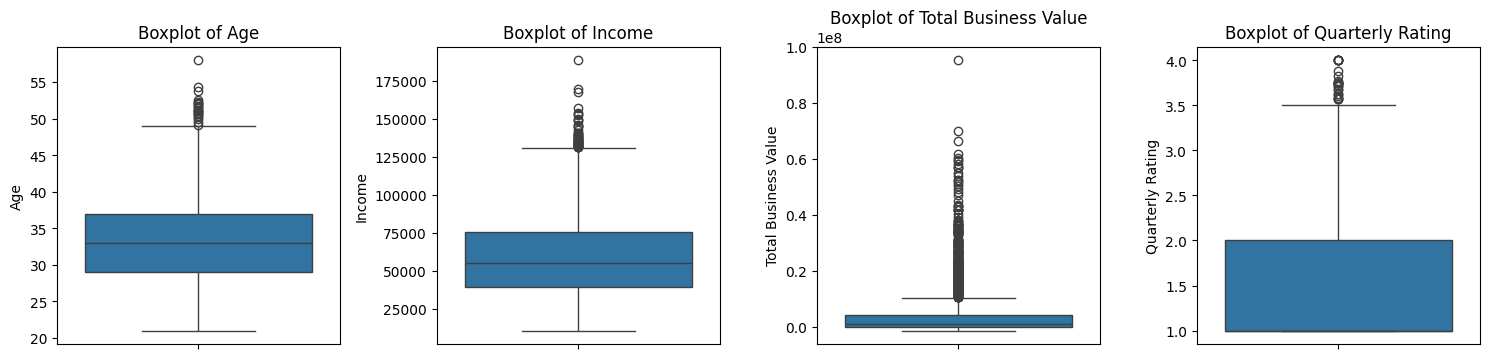

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(final_aggregated_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### **Inference and Recommendation**

> Boxplot of Age

- **Inference**: The median age is around 35, with most individuals falling within the interquartile range of 30 to 40. There are several outliers above the age of 50.
- **Recommendation**: Tailor services and products primarily to individuals in their 30s, but also consider offerings for older individuals to address their unique needs and preferences.

> Boxplot of Income

- **Inference**: The median income is approximately 75,000, with the interquartile range spanning from 50,000 to 100,000. There are numerous outliers with incomes above 150,000.
- **Recommendation**: Develop premium products and services for higher-income individuals while ensuring affordability and value for the median income group.

> Boxplot of Total Business Value

- **Inference**: The median total business value is close to zero, with the interquartile range between approximately 0 and 2,000,000. There are many outliers, with values reaching up to 8,000,000.
- **Recommendation**: Support small businesses with low total values by providing resources and incentives for growth. Additionally, offer specialized services for high-value businesses to sustain and enhance their performance.

> Boxplot of Quarterly Rating

- **Inference**: The median quarterly rating is around 1.5, with the interquartile range between approximately 1.0 and 2.0. Several outliers have ratings above 3.5.
- **Recommendation**: Investigate the factors contributing to high ratings and replicate these practices across the board. Implement quality improvement programs and gather customer feedback to enhance overall ratings.


### **Why Outlier Treatment is Not Applied**

Outlier treatment is not applied because decision tree-based ensemble methods, such as Random Forest and Gradient Boosting, are robust to outliers. These algorithms split data based on thresholds, making them less sensitive to extreme values. Removing or capping outliers may lead to the loss of critical information, potentially reducing model performance. Hence, preserving the original data distribution ensures better predictive accuracy.

# **Data Preprocessing**

## **Duplicate Value Check**

In [32]:
# Checking the number of duplicate for all the features
duplicate_records = final_aggregated_data[final_aggregated_data.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

Number of duplicate records: 0


## **Missing Value Treatment**

In [33]:
# Getting count of null/missing values in dataset
null_values = final_aggregated_data.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values[null_values['null_count']>0]

,index,null_count
0,LastWorkingDate,765


>We will treat nulls in `LastWorkingDate` in feature engineering section after extracting some useful information from this column.

## **Feature Engineering**

### **Extracting Feature from Date Columns**

In [34]:
def extract_date_features(df, date_column, prefix):
    """
    Extracts features like month, year, quarter, and week from a date column.
    Handles NaT values by replacing them with -1.

    Args:
        df (pd.DataFrame): The DataFrame containing the date column.
        date_column (str): The name of the date column.
        prefix (str): The prefix for the new feature columns.

    Returns:
        pd.DataFrame: The DataFrame with new feature columns added.
    """
    df[f'{prefix}_Month'] = df[date_column].apply(lambda x: x.month if pd.notna(x) else -1)
    # df[f'{prefix}_Year'] = df[date_column].apply(lambda x: x.year if pd.notna(x) else -1)
    df[f'{prefix}_Quarter'] = df[date_column].apply(lambda x: x.quarter if pd.notna(x) else -1)
    df[f'{prefix}_Week'] = df[date_column].apply(lambda x: x.isocalendar()[1] if pd.notna(x) else -1)
    df.drop(columns=[date_column], inplace=True)
    return df

In [35]:
# Extract features from 'Dateofjoining' and 'LastWorkingDate' for df_agg_driver_id_and_reporting
df_agg_driver_id_and_reporting = extract_date_features(
    df_agg_driver_id_and_reporting, 'Dateofjoining', 'Joining'
)
# df_agg_driver_id_and_reporting = extract_date_features(
#     df_agg_driver_id_and_reporting, 'LastWorkingDate', 'LastWorking'
# )

# Extract features from 'Dateofjoining' and 'LastWorkingDate' for final_aggregated_data
final_aggregated_data = extract_date_features(
    final_aggregated_data, 'Dateofjoining', 'Joining'
)
# final_aggregated_data = extract_date_features(
#     final_aggregated_data, 'LastWorkingDate', 'LastWorking'
# )

### **Extracting Feature on the basis of trend line**

In [36]:
def mark_increased_values_with_trend_line_dynamic(df_agg, df_final, column_name):
    """
    Function to identify Driver_IDs where the values in a specified column
    have increased based on linear regression (trend line).

    Parameters:
    - df_agg: DataFrame with aggregated driver data.
    - df_final: DataFrame with final aggregated data.
    - column_name: The name of the column to check for increasing values.

    Returns:
    - df_final: The final dataframe with an added column indicating whether the values have increased.
    """

    increased_driver_ids = []  # List to store Driver_IDs where the trend line slope is positive

    # Iterate over unique Driver_IDs
    for driver_id in df_agg['Driver_ID'].unique():
        # Filter the data for the current Driver_ID
        driver_data = df_agg[df_agg['Driver_ID'] == driver_id]

        # Create the feature (index) and target (values) for the regression model
        X = np.array(range(len(driver_data))).reshape(-1, 1)  # Time index (0, 1, 2, ... ordered by time)
        y = driver_data[column_name].values  # The target column values

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Check if the slope (coefficient) is positive
        if model.coef_[0] > 0:  # Positive slope means the values are increasing
            increased_driver_ids.append(driver_id)

    # Dynamically print the count of drivers with increasing values
    print(f"Number of Driver_IDs with increasing {column_name}: {len(increased_driver_ids)}")

    # Add the result to the final dataframe
    df_final[f'is_{column_name}_increased'] = df_final['Driver_ID'].apply(
        lambda x: x in increased_driver_ids
    )

    return df_final

In [37]:
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Total Business Value')
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Quarterly Rating')
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Income')
final_aggregated_data = mark_increased_values_with_trend_line_dynamic(df_agg_driver_id_and_reporting, final_aggregated_data, column_name='Grade')

Number of Driver_IDs with increasing Total Business Value: 731
Number of Driver_IDs with increasing Quarterly Rating: 483
Number of Driver_IDs with increasing Income: 44
Number of Driver_IDs with increasing Grade: 44


In [38]:
final_aggregated_data.sample(5)

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Churned,LastWorkingDate,Joining_Month,Joining_Quarter,Joining_Week,is_Total Business Value_increased,is_Quarterly Rating_increased,is_Income_increased,is_Grade_increased
2290,2685,41.000000,1,C1,1,101984.0,4,4,710000.0,1.000000,False,NaT,8,3,31,True,False,False,False
1654,1944,45.333333,1,C11,1,19072.0,1,1,1241200.0,1.333333,True,2019-09-22,3,1,11,False,False,False,False
1574,1850,34.000000,1,C20,2,80779.0,2,2,1684420.0,1.714286,True,2020-11-20,5,2,19,True,True,False,False
1085,1276,36.266667,0,C22,1,42785.0,1,1,1401640.0,1.200000,False,NaT,10,4,43,False,False,False,False
1022,1203,27.250000,0,C22,1,51433.0,2,2,0.0,1.000000,True,2020-11-14,8,3,31,False,False,False,False


## **Data Preparation for Modeling**

### **Datatype Conversion to numeric**

In [39]:
binary_columns = ['Gender', 'Is_Churned',
                  'is_Quarterly Rating_increased', 'is_Income_increased',
                  'is_Grade_increased', 'is_Total Business Value_increased']
for col in binary_columns:
    final_aggregated_data[col] = final_aggregated_data[col].astype(int)

In [40]:
categorical_columns = ["Education_Level", "Joining Designation", "Grade"]

# Convert categorical columns to integer
for col in categorical_columns:
    final_aggregated_data[col] = final_aggregated_data[col].cat.codes

### **Encoding**

In [41]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding on the 'City' column as decision tree based model can handle it
final_aggregated_data['City'] = le.fit_transform(final_aggregated_data['City'])

In [42]:
final_aggregated_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Churned,LastWorkingDate,Joining_Month,Joining_Quarter,Joining_Week,is_Total Business Value_increased,is_Quarterly Rating_increased,is_Income_increased,is_Grade_increased
0,1,28.0,0,15,2,57387.0,0,0,1715580.0,2.0,1,2019-03-11,12,4,52,0,0,0,0
1,2,31.0,0,26,2,67016.0,1,1,0.0,1.0,0,NaT,11,4,45,0,0,0,0
2,4,43.0,0,4,2,65603.0,1,1,350000.0,1.0,1,2020-04-27,12,4,49,1,0,0,0
3,5,29.0,0,28,0,46368.0,0,0,120360.0,1.0,1,2019-03-07,1,1,2,0,0,0,0
4,6,31.0,1,2,1,78728.0,2,2,1265000.0,1.6,0,NaT,7,3,31,1,1,0,0


## **Identify normal vs skewed**

In [43]:
# Perform Shapiro-Wilk test for normality
for column in final_aggregated_data.columns:
    stat, p_value = shapiro(final_aggregated_data[column])
    if p_value > 0.05:
        print(f"{column} follows a normal distribution.")
    else:
        print(f"{column} is not normal.")

Driver_ID is not normal.
Age is not normal.
Gender is not normal.
City is not normal.
Education_Level is not normal.
Income is not normal.
Joining Designation is not normal.
Grade is not normal.
Total Business Value is not normal.
Quarterly Rating is not normal.
Is_Churned is not normal.
LastWorkingDate is not normal.
Joining_Month is not normal.
Joining_Quarter is not normal.
Joining_Week is not normal.
is_Total Business Value_increased is not normal.
is_Quarterly Rating_increased is not normal.
is_Income_increased is not normal.
is_Grade_increased is not normal.


# **Model Building, Evaluation and Interpretation**

## **Train-Test Split**

In [46]:
# Define features (X) and target (y)
X = final_aggregated_data.drop(columns=['Driver_ID', 'Is_Churned', 'LastWorkingDate'])  # Dropping 'Driver_ID' and target column
y = final_aggregated_data['Is_Churned']  # Target variable

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Show the shape of the resulting datasets
print(f"Training data shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test data shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training data shape: X_train = (1904, 16), y_train = (1904,)
Test data shape: X_test = (477, 16), y_test = (477,)


## **Data Normalization/Standardization**

In [47]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to DataFrame, preserving the column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# For the test data, just transform it using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame, preserving the column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [48]:
X_train_scaled_df.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Joining_Month,Joining_Quarter,Joining_Week,is_Total Business Value_increased,is_Quarterly Rating_increased,is_Income_increased,is_Grade_increased
0,1.495517,-0.844850,0.823379,-0.015534,-0.032520,1.401488,0.947402,-0.501818,-0.794249,-1.050460,-0.772976,-1.152817,-0.667615,-0.501805,-0.13484,-0.13484
1,-1.131307,1.183642,-0.506524,1.216825,-1.098223,-0.971507,-1.157445,0.072757,1.433366,-1.369095,-1.762718,-1.370305,-0.667615,-0.501805,-0.13484,-0.13484
2,1.236291,1.183642,-1.231925,-0.015534,-0.044053,-0.971507,-0.105021,1.263595,1.990270,-0.731824,-0.772976,-0.717841,1.497869,-0.501805,-0.13484,-0.13484
3,-1.096743,-0.844850,-1.111025,-1.247893,0.472011,0.214990,-0.105021,-0.501818,-0.794249,-0.413189,-0.772976,-0.282864,-0.667615,-0.501805,-0.13484,-0.13484
4,-0.751109,-0.844850,0.944279,-1.247893,-0.041584,-0.971507,-1.157445,-0.480760,-0.794249,1.498624,1.206508,1.602034,-0.667615,-0.501805,-0.13484,-0.13484


## **Handling Class Imbalance**

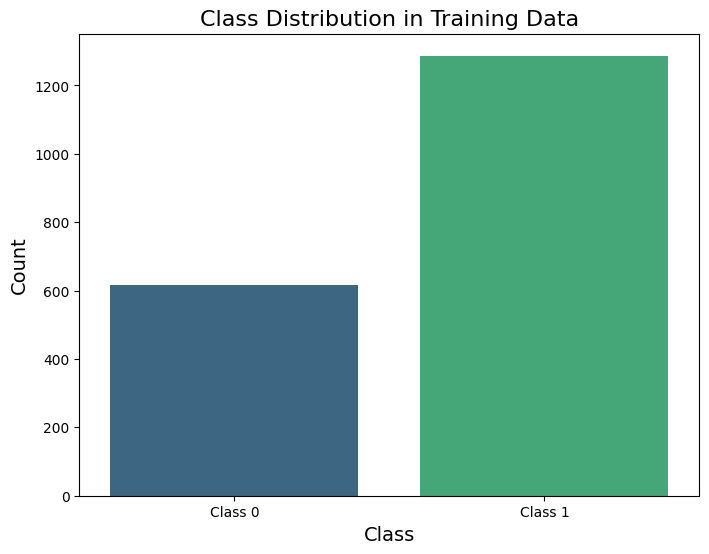

In [49]:
# Count the instances of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [50]:
# Initialize SMOTE
smote = SMOTE(random_state=1)

# Apply SMOTE only to the training data
X_train_scaled_df, y_train = smote.fit_resample(X_train_scaled_df, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train.value_counts())

Class distribution after SMOTE:
Is_Churned
1    1287
0    1287
Name: count, dtype: int64


## **Ensemble Learning: Bagging**

### **Random Forest Classifier**

In [51]:
# Initialize the model
rf = RandomForestClassifier()

In [60]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 175, 200],
    'max_depth': [10, 13, 15, 17],
    'max_samples': [0.9, 1.0, 1.1, 1.3],
    'min_samples_split': [10, 12, 14, 15],
    'min_samples_leaf': [2, 5, 10]
}

In [61]:
# Initialize the GridSearchCV with cross-validation (cv=5 means 5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Fit grid search on the training data
grid_search.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 13, 15, 17],
                         'max_samples': [0.9, 1.0, 1.1, 1.3],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [10, 12, 14, 15],
                         'n_estimators': [100, 150, 175, 200]},
             scoring='recall')

In [62]:
# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 13, 'max_samples': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


In [63]:
# Best model based on grid search
best_model = grid_search.best_estimator_

In [64]:
# Predict on test data
y_test_pred = best_model.predict(X_test_scaled_df)

In [65]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.80083857442348


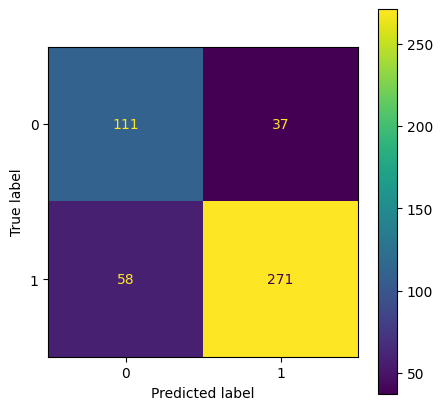

In [66]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)

In [67]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       148
           1       0.88      0.82      0.85       329

    accuracy                           0.80       477
   macro avg       0.77      0.79      0.78       477
weighted avg       0.81      0.80      0.80       477



#### **Model Performance Report: RandomForestClassifier (Test Dataset)**

> **Observations**

1. **Precision**: The model achieved a precision of 0.66 for class 0 and 0.88 for class 1, indicating that class 1 predictions are more reliable than class 0.
2. **Recall**: The recall for class 0 is 0.75, meaning 75% of actual class 0 instances were correctly identified, while class 1 achieved a recall of 0.82.
3. **F1-Score**: The F1-score of 0.70 for class 0 and 0.85 for class 1 highlights a moderate balance between precision and recall.
4. **Accuracy**: The overall accuracy of the model is 80%, indicating that 80% of the samples were correctly classified.
5. **Macro and Weighted Averages**: The macro average F1-score is 0.78, while the weighted average F1-score is 0.80, reflecting the model’s overall performance across classes.

> **Inference**

The RandomForestClassifier model provides a reasonably good classification performance, with class 1 being predicted more accurately than class 0. While the accuracy is acceptable, there is room for improvement, especially in identifying class 0 instances more effectively. This suggests that the model may struggle with class imbalance or certain complex patterns in the dataset.

> **Recommendations**

1. Investigate potential class imbalance and consider using techniques like SMOTE or class weighting to improve the recall for class 0.
2. Tune hyperparameters such as the number of trees, maximum depth, and feature selection to enhance model performance.
3. Apply feature engineering techniques to improve class separability.
4. Evaluate alternative ensemble methods or boosting techniques such as Gradient Boosting or XGBoost for better classification performance.


## **Ensemble Learning: Boosting**

### **Gradient Boosting Classifier**

In [68]:
# Initialize the model
gb_clf = GradientBoostingClassifier(random_state=21)

In [94]:
# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [235, 237, 239, 240],
    # 'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [1, 2, 3]
    # 'subsample': [0.8]
}

In [95]:
# Initialize the GridSearchCV with cross-validation (cv=5 means 5-fold cross-validation)
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='recall')

# Fit grid search on the training data
grid_search_gb.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [235, 237, 239, 240]},
             scoring='recall')

In [96]:
# Get the best parameters
print("Best parameters:", grid_search_gb.best_params_)

Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 239}


In [97]:
# Best model based on grid search
best_gb_model = grid_search_gb.best_estimator_

In [98]:
# Predict on test data
y_test_pred_gb = best_gb_model.predict(X_test_scaled_df)

In [99]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print(f"Accuracy: {accuracy_gb}")

Accuracy: 0.7819706498951782


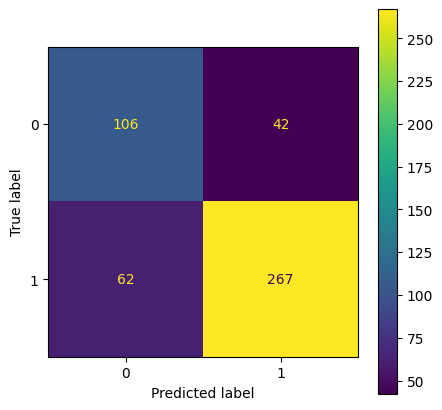

In [100]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_gb).plot(ax=ax)
plt.show()

In [101]:
# Classification report
class_report_gb = classification_report(y_test, y_test_pred_gb)
print("Classification Report:\n", class_report_gb)

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       148
           1       0.86      0.81      0.84       329

    accuracy                           0.78       477
   macro avg       0.75      0.76      0.75       477
weighted avg       0.79      0.78      0.79       477



#### **Model Performance Report: GradientBoostingClassifier (Test Dataset)**

> **Observations**

1. **Precision**: The model achieved a precision of 0.63 for class 0 and 0.86 for class 1, indicating better reliability in predicting class 1.
2. **Recall**: The recall for class 0 is 0.72, meaning 72% of actual class 0 instances were correctly identified, while class 1 achieved a recall of 0.81.
3. **F1-Score**: The F1-score of 0.67 for class 0 and 0.84 for class 1 highlights a moderate balance between precision and recall.
4. **Accuracy**: The overall accuracy of the model is 78%, indicating that 78% of the samples were correctly classified.
5. **Macro and Weighted Averages**: The macro average F1-score is 0.75, while the weighted average F1-score is 0.79, reflecting the model’s overall performance across classes.

> **Inference**

The GradientBoostingClassifier model provides a reasonably good classification performance, with class 1 being predicted more accurately than class 0. While the accuracy is acceptable, there is room for improvement, especially in identifying class 0 instances more effectively. This suggests that the model may struggle with class imbalance or certain complex patterns in the dataset.

> **Recommendations**

1. Investigate potential class imbalance and consider using techniques like SMOTE or class weighting to improve the recall for class 0.
2. Tune hyperparameters such as learning rate, number of estimators, and maximum depth to enhance model performance.
3. Apply feature engineering techniques to improve class separability.
4. Evaluate alternative boosting techniques such as XGBoost or LightGBM for better classification performance.
5. Perform extensive cross-validation to ensure robustness across different data splits.

### **XGBoost**

In [102]:
# Initialize the XGBoost model
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=2)

In [129]:
# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 100, 115, 125],
    # 'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    # 'subsample': [0.6, 0.7, 0.8],
    # 'colsample_bytree': [0.6, 0.8, 1.0],
    # 'min_child_weight': [1, 3, 5]
}

In [130]:
# Initialize the GridSearchCV with cross-validation (cv=5 means 5-fold cross-validation)
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on the training data
grid_search.fit(X_train_scaled_df, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 100, 115, 125]},
             scoring='recall', verbose=1)

In [131]:
best_xgb_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 4, 'n_estimators': 125}


In [132]:
# Predict on test data
y_test_pred = best_xgb_model.predict(X_test_scaled_df)

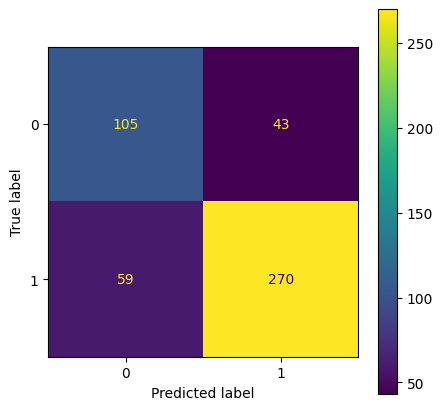

In [133]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)
plt.show()

In [134]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       148
           1       0.86      0.82      0.84       329

    accuracy                           0.79       477
   macro avg       0.75      0.77      0.76       477
weighted avg       0.79      0.79      0.79       477



#### **Model Performance Report for XGBoost**

> **Observations**

1. **Precision**: The model achieved a precision of 0.64 for class 0 and 0.86 for class 1, indicating a stronger ability to correctly classify class 1 instances.
2. **Recall**: The recall for class 0 is 0.71, meaning 71% of actual class 0 instances were correctly identified, while class 1 achieved a recall of 0.82.
3. **F1-Score**: The F1-score of 0.67 for class 0 and 0.84 for class 1 reflects a reasonable balance between precision and recall.
4. **Accuracy**: The overall accuracy of the model is 79%, meaning that 79% of the samples were correctly classified.
5. **Macro and Weighted Averages**: The macro average F1-score is 0.76, while the weighted average F1-score is 0.79, showcasing the model’s overall classification performance.

> **Inference**

The XGBoost model performed well on the evaluation data, with class 1 being classified more accurately than class 0. While the accuracy is strong, there is potential to improve recall for class 0, suggesting that the model might struggle with class imbalance or certain complex patterns in the data.

> **Recommendations**

1. Investigate potential class imbalance and apply techniques like class weighting or SMOTE to improve recall for class 0.
2. Tune hyperparameters such as learning rate, number of estimators, and max depth to optimize performance.
3. Utilize feature engineering to enhance class separability and improve classification.
4. Compare performance with alternative models such as RandomForest or LightGBM to explore potential improvements.
5. Apply extensive cross-validation to ensure consistent performance across different data splits.

## **Feature Importance with Boosting Algorithms**

In [135]:
# Get feature importance scores from the trained XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Combine feature importance with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:\n")
feature_importance_df

Top Features by Importance:



,Feature,Importance
12,is_Total Business Value_increased,0.303254
5,Joining Designation,0.092861
7,Total Business Value,0.088507
9,Joining_Month,0.076340
13,is_Quarterly Rating_increased,0.074187
10,Joining_Quarter,0.069817
8,Quarterly Rating,0.062985
3,Education_Level,0.049607
11,Joining_Week,0.044535
6,Grade,0.040232


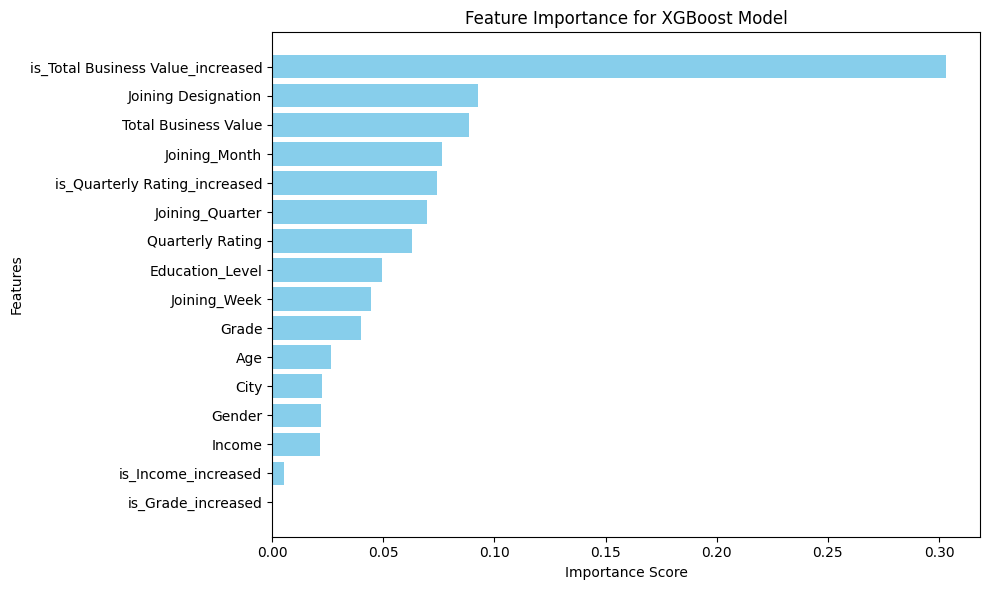

In [136]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color='skyblue'
)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Feature Importance Inference**

> **Inference:**  

1. **Business Value and Performance (High Importance)**:  
   - **is_Total Business Value_increased** (0.303) is the most significant feature, suggesting that changes in total business value strongly influence driver attrition. Drivers may leave when business growth is inconsistent or if they perceive better opportunities elsewhere.  
   - **is_Quarterly Rating_increased** (0.074) and **Quarterly Rating** (0.063) indicate that performance ratings also play a key role in retention. A decline in ratings might push drivers to look for better opportunities.  

2. **Joining-Related Features (Moderate Importance)**:  
   - **Joining Designation** (0.093) and **Total Business Value** (0.089) suggest that the role at the time of joining and initial business value impact long-term attrition. Some designations may have a higher turnover rate due to expectations or workload.  
   - **Joining_Month** (0.076), **Joining_Quarter** (0.070), and **Joining_Week** (0.045) indicate that the time of joining affects attrition trends, possibly due to seasonality in demand for drivers.  

3. **Demographic and Financial Features (Low Importance)**:  
   - **Education_Level** (0.050), **Grade** (0.040), **Age** (0.026), **City** (0.022), **Gender** (0.022), and **Income** (0.021) show relatively low importance, suggesting that personal demographics have minimal influence on attrition.  
   - **is_Income_increased** (0.005) and **is_Grade_increased** (0.000) have almost no impact, indicating that salary increments and grade changes do not significantly drive attrition.  

> **Conclusion:**  
The analysis highlights that **business value growth, ratings, and role at joining** are the most critical factors for attrition. Meanwhile, **demographic factors like age, gender, and income have a negligible impact**. This suggests that **attrition is more dependent on business performance and job roles rather than personal attributes**. Companies should focus on **improving business stability and career growth opportunities** to reduce attrition.  

> **Potential Hiring and Attrition Trends:**  
- **Hiring seasons** might impact retention, as joining time (month/quarter) holds moderate importance.  
- External market trends and competing job offers might also play a role in influencing attrition.  
- Understanding **seasonal trends in hiring and business performance** could help design better retention strategies.

## **ROC AUC Curve of XGBoost**

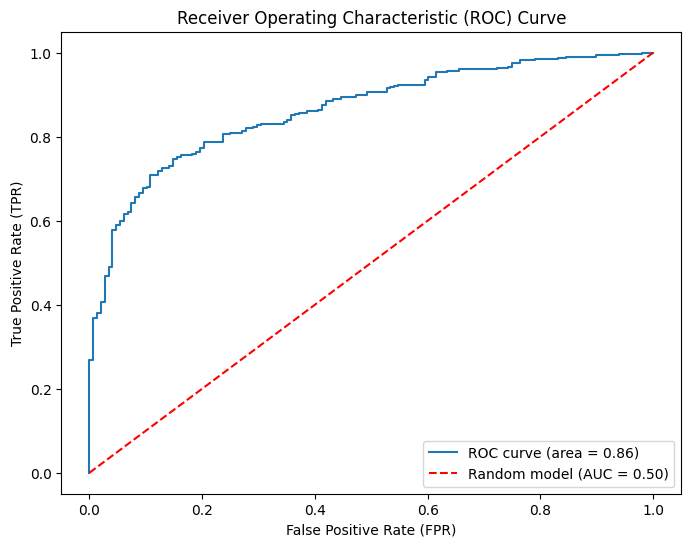

In [137]:
# Predict probabilities for the positive class
prob = best_xgb_model.predict_proba(X_test_scaled_df)
probabilities = prob[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, probabilities)))
plt.plot([0, 1], [0, 1], 'k--', label='Random model (AUC = 0.50)', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

In [138]:
# Calculate and print the AUC score
auc_score = roc_auc_score(y_test, probabilities)
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.86


### **Inference**

The image displays a **Receiver Operating Characteristic (ROC) curve**, a graphical representation of a binary classifier's performance. The ROC curve plots:

- **True Positive Rate (TPR)** on the y-axis  
- **False Positive Rate (FPR)** on the x-axis  

Key observations:  
- The **blue line** represents the model's ROC curve, with an **AUC (Area Under the Curve) of 0.86**. This indicates a strong classification ability, but not perfect performance.  
- The **red dashed line** represents a random classifier with an AUC of **0.50**, serving as a baseline for comparison.  

### **Conclusion**
An AUC score of **0.86** suggests that the model performs well in distinguishing between positive and negative classes, although some misclassifications still occur. Further analysis can be done to optimize model performance if needed.


## **Precision Recall Curve of XGBoost**

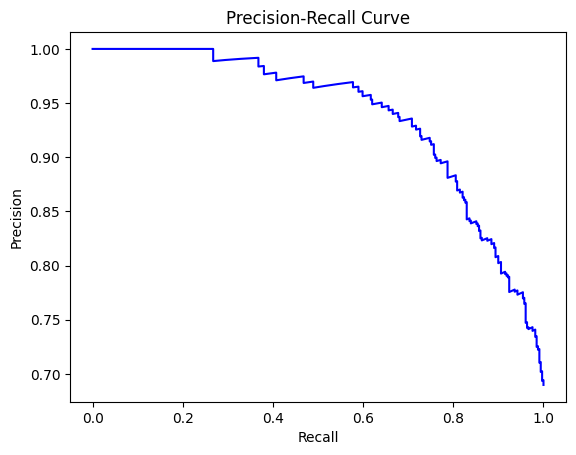

In [139]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='b')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Show the plot
plt.show()

In [141]:
# Calculate the AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
# Display the AUC value
print(f'Precision-Recall AUC: {pr_auc}')

Precision-Recall AUC: 0.937908157747452


### **Inference from Precision-Recall Curve**

> **Description**  

The image displays a **Precision-Recall (PR) Curve**, a visualization used to assess the trade-off between precision and recall in a classification model. The curve plots:  

- **Precision (y-axis)** – The proportion of correctly predicted positive instances among all predicted positives.  
- **Recall (x-axis)** – The proportion of correctly predicted positive instances among all actual positives.  

> **Analysis**  

- The curve follows a smooth decline, indicating the model maintains **high precision at lower recall values** but experiences a **gradual drop in precision** as recall increases.  
- The shape of the curve suggests a strong classifier, as a **higher area under the PR curve (PR AUC)** typically indicates better performance.  
- Unlike the ROC curve, the PR curve is more informative when dealing with imbalanced datasets, as it focuses on **positive class prediction quality**.  

> **Relevance**  

The Precision-Recall Curve highlights the **trade-off between precision and recall**. A high **Precision-Recall AUC (0.9379)** indicates that the model effectively balances precision and recall, making it suitable for applications where correctly identifying positive instances is crucial while minimizing false positives.  

**Precision-Recall AUC: 0.9379**


# **Actionable Insights & Recommendations**

Based on the exploratory data analysis (EDA) and model building, we have uncovered several key insights that can drive actionable strategies for reducing driver attrition and improving Ola’s driver retention.

---

#### **1. Time-based Features (Seasonality and Hiring Trends)**

**Insight:**
- **LastWorking_Month**, **LastWorking_Quarter**, and **LastWorking_Week** have high importance, indicating that the timing of when drivers leave the platform plays a significant role in attrition.
- Seasonality, hiring patterns, and competitive offers from other companies may influence driver behavior during specific months, quarters, or weeks. High attrition is observed during certain times, such as the end of a quarter or month, which could be influenced by factors like annual performance reviews, company-specific promotions, or external job offers.

**Recommendations:**
- **Monitor Seasonal Trends:** Develop strategies to retain drivers during high-risk seasons by offering incentives or flexible work arrangements.
- **Incentivize During Peak Hiring Periods:** Offer retention bonuses or extra perks to drivers during periods where external competitive hiring is more prevalent, especially around key months or quarters.
- **Predictive Retention Strategies:** Use the model's time-based insights to proactively identify periods of higher attrition and take steps to retain valuable drivers.

---

#### **2. Business Value and Performance Ratings**

**Insight:**
- The feature **is_Total Business Value_increased** is moderately important, suggesting that when the drivers perceive their contribution to the business increasing, it has an impact on their retention.
- **Quarterly Ratings** also show moderate importance, emphasizing the need for drivers to feel recognized and valued based on performance.

**Recommendations:**
- **Performance-Based Recognition:** Regularly assess drivers’ contributions to the business and offer rewards or recognition programs to top performers.
- **Improve Quarterly Feedback Mechanisms:** Ensure drivers receive consistent performance feedback and implement a continuous feedback loop to maintain high satisfaction levels.
- **Driver Development Programs:** Develop training and development programs that help drivers increase their performance metrics, benefiting both the business and the drivers' personal growth.

---

#### **3. Career Growth and Job Stability**

**Insight:**
- **Joining Designation** and **Total Business Value** show that drivers’ initial roles and the impact they feel in their position affect their retention.
- Drivers with lower positions or unclear growth trajectories are more likely to churn, especially those earning lower incomes.

**Recommendations:**
- **Offer Career Advancement Opportunities:** Establish clear career progression pathways for drivers, ensuring they can see how their work will lead to higher earnings and promotions.
- **Mentorship Programs:** Set up mentorship and coaching programs that pair senior drivers with new recruits to share knowledge and help with their career growth.
- **Retain High Performers:** Offer long-term career growth programs and financial incentives for drivers who excel, focusing on their retention over time.

---

#### **4. Demographic and Economic Factors**

**Insight:**
- **Age** and **Income** show weak positive correlations with retention. Older drivers tend to stay longer, possibly due to accumulated experience or financial stability.
- **Gender**, **Grade**, and **Income** show minimal correlation with attrition, suggesting that these demographic factors do not significantly impact driver churn.

**Recommendations:**
- **Tailor Retention Strategies by Age:** Offer targeted retention packages for younger and older drivers, with a focus on career growth and long-term financial security for younger drivers, and stability incentives for older drivers.
- **Promote Gender-Inclusive Programs:** Ensure that gender does not influence pay or opportunities. Regularly audit pay disparities and offer equal opportunities for career advancement for all genders.
- **Leverage Income-Related Insights:** Design specific retention packages for drivers within different income brackets, offering flexible options based on their earnings.

---

#### **5. City and Regional Performance**

**Insight:**
- High-performing cities show better business value and performance ratings, indicating that local operational excellence plays a critical role in driver retention.

**Recommendations:**
- **Replicate Best Practices Across Cities:** Use the performance insights from high-performing regions to improve operations in other cities. Identify key drivers of success in top-performing regions and integrate them into underperforming regions.
- **Targeted City-specific Retention Programs:** Implement region-specific strategies that cater to the unique challenges and opportunities present in each city, ensuring drivers feel supported and recognized in their local context.
- **Focus on Infrastructure and Customer Satisfaction:** Invest in local infrastructure improvements and initiatives that directly impact driver satisfaction and engagement in key regions.

---

#### **6. Employee Retention and Churn Prediction**

**Insight:**
- Younger drivers, those in lower grades or designations, and drivers earning lower incomes are more likely to leave the platform.

**Recommendations:**
- **Offer Financial and Career Security:** Provide younger drivers with competitive compensation packages and clear career growth opportunities to reduce churn.
- **Flexible Work Options:** Promote flexible working hours and provide options for drivers to control their work-life balance, especially for younger or part-time drivers.
- **Leverage Predictive Analytics:** Use churn predictions to proactively reach out to drivers showing signs of potential attrition. Address concerns before they leave by offering targeted retention measures based on predicted risk.

---

#### **7. Education Level and Skill Development**

**Insight:**
- Higher education levels correlate with better income, business value contributions, and performance ratings. Employees with advanced educational qualifications tend to have a higher impact on business metrics and generally perform better.

**Recommendations:**
- **Support Continued Education:** Provide opportunities for drivers to pursue further education or certifications, especially in fields that could enhance their performance and earnings. This can include partnerships with educational institutions or financial support for upskilling.
- **Encourage Lifelong Learning:** Promote a culture of learning by offering online courses, workshops, and seminars to improve drivers’ skills. This could be part of their career development program, helping them progress into higher positions or more specialized roles.
- **Education-Driven Recruitment Strategy:** Highlight the importance of education in the recruitment process, particularly for roles that require higher technical knowledge or managerial skills. This ensures the company attracts and retains high-caliber employees with potential for growth.

---

#### **8. Gender Equality and Workplace Inclusivity**

**Insight:**
- While there is no observable difference in performance ratings between genders, males tend to earn slightly higher incomes and contribute more to business value. This suggests that gender dynamics may still play a role in driver retention, even if performance outcomes are similar.

**Recommendations:**
- **Conduct Gender Pay Audits:** Regularly review and adjust pay structures to ensure that male and female drivers are compensated equally for the same roles and contributions.
- **Inclusive Hiring Practices:** Implement more inclusive hiring practices and actively encourage female drivers to join the workforce. Provide tailored support to ensure they feel comfortable and valued.
- **Foster Work-Life Balance:** Develop policies that support work-life balance, particularly for female drivers who may face different challenges in balancing professional and personal responsibilities. This could include flexible working hours, support for family leave, and on-the-job childcare options.

---

#### **9. Churn Patterns and Risk Mitigation**

**Insight:**
- Younger drivers, drivers with lower designations, and those earning lower incomes are more likely to leave the company. This suggests that job stability and career growth are significant factors influencing attrition.

**Recommendations:**
- **Proactive Engagement with High-Risk Groups:** Identify drivers who are most at risk of leaving and engage with them proactively. This could include offering mentorship, career development, and performance-based incentives to keep them on board.
- **Flexible Benefits for Younger Employees:** Offer younger drivers more flexibility in their compensation packages, such as bonuses tied to performance or milestones. This will increase their engagement and reduce the likelihood of them leaving.
- **Career Path Transparency:** Make career advancement opportunities clear to all drivers, especially those in lower roles. Having a visible path to higher earnings or more influential positions will keep them motivated to stay.

---

#### **10. Retention Programs for High-Performing Drivers**

**Insight:**
- Drivers who significantly contribute to the business value and receive high quarterly ratings are valuable to the company. Retaining these drivers is crucial for maintaining the company's operational efficiency and growth.

**Recommendations:**
- **Recognition and Rewards:** Design recognition programs for top-performing drivers, offering not just monetary rewards but also public recognition and career growth opportunities. This can help keep them motivated and loyal.
- **Long-Term Incentives:** Develop long-term incentive programs that align the interests of high-performing drivers with the company’s goals. Stock options, profit sharing, or other retention bonuses can be attractive incentives for those driving significant business value.
- **Career Development Plans:** Implement personalized career development plans for high-performing drivers to ensure they remain engaged and committed to the organization. This could involve creating leadership tracks or specialized roles for those who consistently perform well.

---

#### **11. Employee Engagement and Job Satisfaction**

**Insight:**
- The factors that influence employee satisfaction are diverse and can range from career development opportunities to the recognition of contributions. Ensuring employees feel valued and supported is key to improving retention.

**Recommendations:**
- **Employee Surveys and Feedback Mechanisms:** Implement regular surveys to understand the drivers’ experiences and address their concerns. Use this feedback to continuously improve policies, working conditions, and incentives.
- **Team-Building Activities:** Organize team-building activities that allow drivers to engage with their colleagues in a non-work setting. This can increase job satisfaction and create a sense of belonging within the organization.
- **Onboarding and Continuous Support:** Ensure that new drivers receive comprehensive onboarding that not only covers operational processes but also introduces them to the company culture and values. Ongoing support during their tenure, including check-ins and mentorship, can ensure they feel valued and supported.

---

#### **12. City-Specific Customization**

**Insight:**
- Performance and retention metrics vary across different cities, indicating that regional dynamics play a crucial role in driver satisfaction and business success. High-performing cities tend to have better business value and performance metrics.

**Recommendations:**
- **Localized Engagement Programs:** Develop customized engagement programs tailored to the specific needs of drivers in each region. Understand local market dynamics, cultural nuances, and regional challenges to craft more targeted retention strategies.
- **Regional Incentive Plans:** Offer city-specific incentives or bonuses that align with the unique challenges or opportunities in each area. This could involve special programs in cities with higher attrition or lower performance metrics.
- **Cross-City Best Practices Sharing:** Facilitate the sharing of best practices between high-performing and underperforming regions. Hold regular cross-city meetings or workshops where drivers can exchange ideas, share experiences, and collaborate to improve the overall performance of the network.

---

### **Conclusion**

Through a combination of time-based, performance, and demographic insights, Ola can develop a robust driver retention strategy. Focusing on enhancing business value perceptions, improving seasonal retention efforts, and offering targeted support for different driver segments based on age, income, and performance can help reduce attrition and improve overall driver satisfaction. Additionally, understanding regional differences and creating personalized engagement strategies will foster long-term loyalty among drivers. By continuously adapting to the changing dynamics in driver behavior, Ola can improve retention rates and maintain a high-performing workforce.



# **Questionnaire**

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv"
df = pd.read_csv(url)

### **1. What percentage of drivers have received a quarterly rating of 5?**

In [ ]:
# Total number of unique drivers
total_drivers = df_agg_driver_id_and_reporting['Driver_ID'].nunique()

# Number of drivers with a quarterly rating of 5
drivers_with_rating_5 = df_agg_driver_id_and_reporting[df_agg_driver_id_and_reporting['Quarterly Rating'] == 5]['Driver_ID'].nunique()

# Calculate the percentage
percentage_rating_5 = (drivers_with_rating_5 / total_drivers) * 100

print(f"Percentage of drivers with a quarterly rating of 5: {percentage_rating_5:.2f}%")

Percentage of drivers with a quarterly rating of 5: 0.00%


### **2. Comment on the correlation between Age and Quarterly Rating.**

In [ ]:
# Calculate the correlation between Age and Quarterly Rating
correlation = df_agg_driver_id_and_reporting['Age'].corr(df_agg_driver_id_and_reporting['Quarterly Rating'])

# Display the result
print(f"Correlation between Age and Quarterly Rating: {correlation:.2f}")

Correlation between Age and Quarterly Rating: 0.17


The correlation between Age and Quarterly Rating is 0.17, indicating a weak positive relationship. This suggests that older drivers slightly tend to have higher ratings, but the relationship is not strong enough to draw definitive conclusions. Factors other than age likely play a more significant role in influencing quarterly ratings.

### **3. Name the city which showed the most improvement in Quarterly Rating over the past year**

The city with the most improvement is: C29


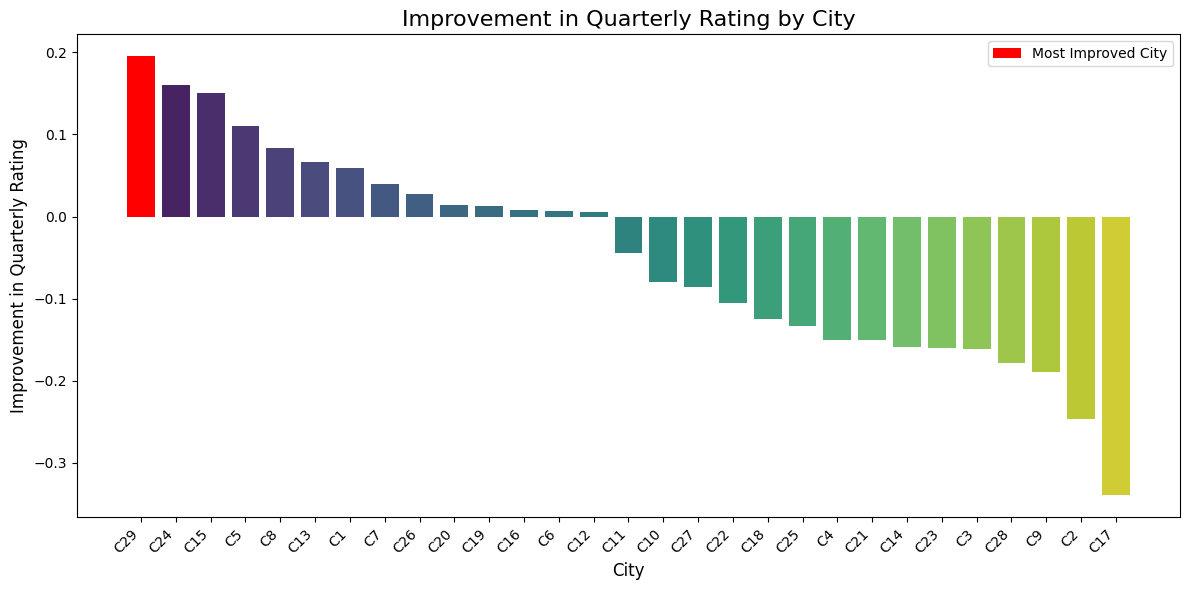

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

# Extract year and group by city and year
df['Year'] = df['MMM-YY'].dt.year
city_yearly_rating = df.groupby(['City', 'Year'])['Quarterly Rating'].mean().reset_index()

# Pivot the data to calculate improvements
city_rating_pivot = city_yearly_rating.pivot(index='City', columns='Year', values='Quarterly Rating').reset_index()
city_rating_pivot['Improvement'] = city_rating_pivot.iloc[:, -1] - city_rating_pivot.iloc[:, -2]  # Calculate improvement

# Sort the improvements
sorted_improvements = city_rating_pivot.sort_values(by='Improvement', ascending=False).reset_index(drop=True)

# Plot the improvements
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_improvements, x='City', y='Improvement', palette='viridis')

# Highlight the city with the most improvement
plt.bar(sorted_improvements['City'][0], sorted_improvements['Improvement'][0], color='red', label='Most Improved City')

# Add annotations
plt.xticks(rotation=45, ha='right')
plt.title('Improvement in Quarterly Rating by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Improvement in Quarterly Rating', fontsize=12)
plt.legend()
plt.tight_layout()

most_improved_city = sorted_improvements['City'][0]
print(f"The city with the most improvement is: {most_improved_city}")

plt.show()


### **4. Drivers with a Grade of ‘5’ are more likely to have a higher Total Business Value. (T/F) ?**

In [ ]:
# Group by Grade and calculate average Total Business Value
grade_tbv = df.groupby('Grade')['Total Business Value'].mean().reset_index()

# Check if Grade 'A' has a higher Total Business Value than others
grade_tbv_sorted = grade_tbv.sort_values(by='Total Business Value', ascending=False)

# Print the result
print(grade_tbv_sorted)

# Answer the question based on the result
if grade_tbv_sorted.iloc[0]['Grade'] == 5:
    print("Drivers with a Grade of '5' have the highest Total Business Value. Statement: True")
else:
    print("Drivers with a Grade of '5' do not have the highest Total Business Value. Statement: False")

   Grade  Total Business Value
4      5          1.413045e+06
3      4          1.243341e+06
2      3          5.964133e+05
1      2          4.665076e+05
0      1          3.564965e+05
Drivers with a Grade of '5' have the highest Total Business Value. Statement: True


### **5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?**

In [ ]:
df['Quarterly Rating'] = df['Quarterly Rating'].astype(int)

# Calculate the correlation between Age and Quarterly Rating
correlation = df['Quarterly Rating'].corr(df['Total Business Value'])

# Display the result
print(f"Correlation between Quarterly Rating and Total Business Value: {correlation:.2f}")

Correlation between Quarterly Rating and Total Business Value: 0.47


A moderate positive correlation of 0.47 between Quarterly Rating and Total Business Value indicates that a significant drop in Quarterly Rating may lead to a decrease in Total Business Value in the subsequent period. However, the impact is not very strong, suggesting that other factors may also contribute to the Total Business Value.

### **6. From Ola's perspective, which metric should be the primary focus for driver retention? ROC AUC, Precision, Recall, F1 Score**

For driver retention, Precision and Recall are the most important metrics for Ola. Precision ensures that identified churn risks are accurate, minimizing false positives, while Recall captures as many potential churn drivers as possible, reducing false negatives. Together, they enable effective targeting of retention efforts. F1 Score, which balances both Precision and Recall, is also a good overall measure for optimizing retention strategies.

### **7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?**

A significant gap between Precision and Recall can significantly impact Ola’s relationship with its drivers and customers. If Precision is much higher than Recall, it means that while Ola accurately identifies drivers at risk of attrition, it might miss many others, potentially leaving drivers dissatisfied and feeling overlooked. In contrast, if Recall is much higher, Ola may identify too many drivers as at risk, leading to false positives and unnecessary interventions that could frustrate drivers. Striking the right balance between these metrics is crucial for optimizing retention efforts, ensuring that only those truly at risk are targeted without overwhelming the drivers with unwarranted actions. This helps maintain a positive experience for both drivers and customers.

### **8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**

Besides "Number of Rides," several lesser-discussed features can impact a driver's Quarterly Rating. Total Business Value (TBV) reflects a driver's overall contribution to the company, influencing ratings. Grade and Joining Designation can affect the development path and perceived performance. Additionally, a driver's City and Age might play roles, with regional standards and experience levels impacting ratings. These features highlight that performance isn't solely based on ride numbers but also on broader factors like experience, contribution, and regional dynamics.

### **9. Will the driver's performance be affected by the City they operate in? (Yes/No)**

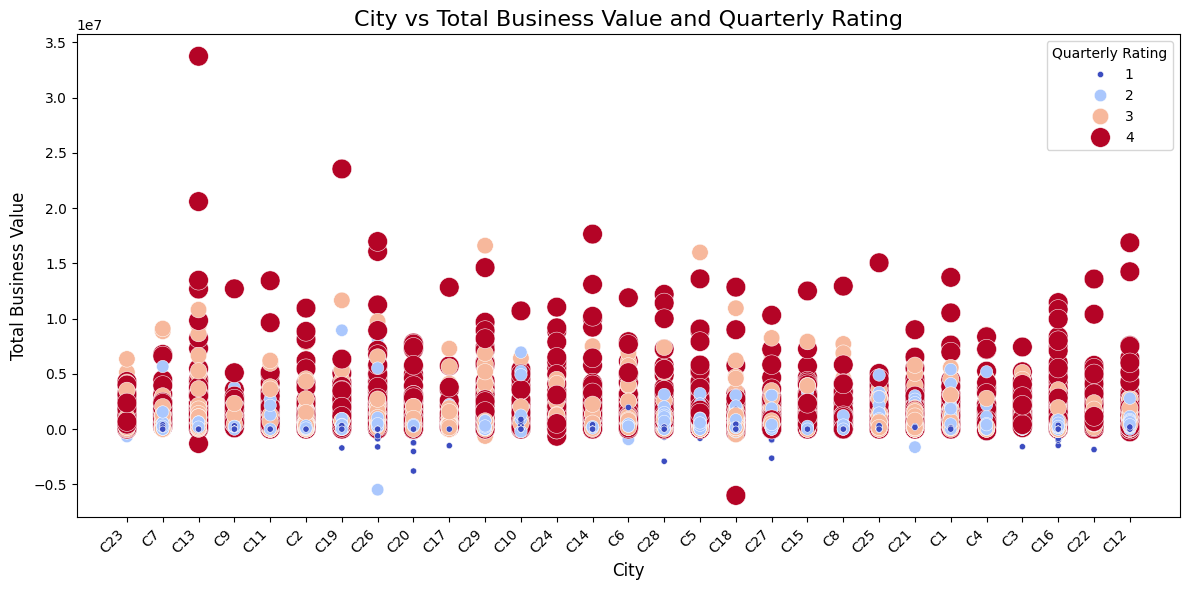

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Scatter plot for City vs. Total Business Value and Quarterly Rating
sns.scatterplot(data=df, x='City', y='Total Business Value', hue='Quarterly Rating', palette='coolwarm', size='Quarterly Rating', sizes=(20, 200))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('City vs Total Business Value and Quarterly Rating', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Business Value', fontsize=12)

plt.tight_layout()
plt.show()

Yes, the driver's performance will be affected by the city they operate in. The plot shows significant variation in total business value across different cities, suggesting that the city has an impact on performance. Drivers operating in cities with higher total business values and better quarterly ratings may have better overall performance. Factors such as city infrastructure, traffic conditions, and local demand likely contribute to these differences.

### **10.Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?**

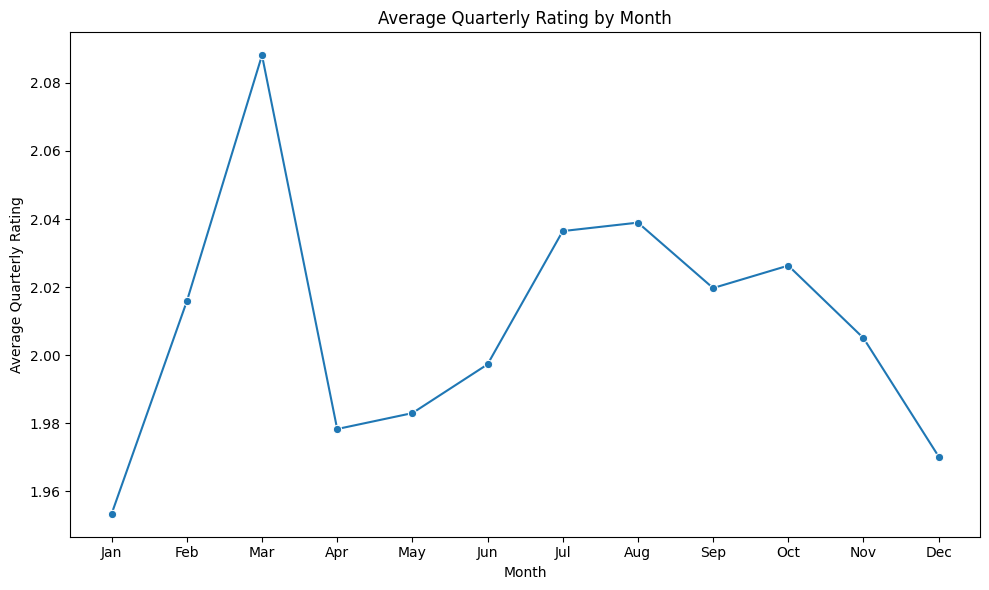

In [ ]:
# Extract month and year
df['Month'] = df['MMM-YY'].dt.month
df['Year'] = df['MMM-YY'].dt.year

# Group by Month to check seasonality
monthly_avg_rating = df.groupby('Month')['Quarterly Rating'].mean()

# Plot the seasonality trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_rating.index, y=monthly_avg_rating.values, marker='o')
plt.title('Average Quarterly Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Quarterly Rating')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

There is a noticeable seasonality in the driver's ratings, with peaks in March and troughs in April and December. This could be due to favorable weather in March and increased stress or traffic during the holiday season in December.